# BINF-F401 - Computational Methods for Functional Genomics

## Question 1. Exploration of clinical variables

### 1.1 Explore and preprocess the clinical data set

In [3]:
# Read the TSV file into a data frame
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
head(clinical_data, 3)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326


In [24]:
summary(clinical_data)

    SMPLID             SUBJID             COHORT               SEX       
 Length:280         Length:280         Length:280         Min.   :1.000  
 Class :character   Class :character   Class :character   1st Qu.:1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :1.000  
                                                          Mean   :1.357  
                                                          3rd Qu.:2.000  
                                                          Max.   :2.000  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   Max.   :273.8   Max.   :34.99  
   SMPTHNTS            TRIS

We need to convert the character variables into factors to use them efficiently. 

In [4]:
library(dplyr)
# Convert character columns to factors using dplyr
clinical_data <- clinical_data %>%
  mutate_if(is.character, as.factor)


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




The problem is that some categorical variables are still considered as double (SEX, DTHHRDY and DTHVNT)

In [5]:
# Convert SEX, DTHHRDY and DTHVNT to factors
clinical_data$SEX <- as.factor(clinical_data$SEX)
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$DTHVNT <- as.factor(clinical_data$DTHVNT)

In [28]:
summary(clinical_data)

             SMPLID           SUBJID                  COHORT    SEX    
 GTEX.111YS.0526:  1   GTEX.111YS:  1   Organ Donor (OPO):143   1:180  
 GTEX.1122O.1126:  1   GTEX.1122O:  1   Postmortem       :137   2:100  
 GTEX.1128S.0326:  1   GTEX.1128S:  1                                  
 GTEX.117XS.0426:  1   GTEX.117XS:  1                                  
 GTEX.117YW.0226:  1   GTEX.117YW:  1                                  
 GTEX.11DXX.0426:  1   GTEX.11DXX:  1                                  
 (Other)        :274   (Other)   :274                                  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   M

We can now see more clearly what each variable represents in the data set. 

Here is a brief description of what each variable represents : 

Clinical variables

- `AGE` is the age of the donor
- `SEX` is the sex of the donor
- `HGHT` is the height of the donor
- `WGHT` is the weight of the donor
- `BMI` is the Body Mass Index of the donor, which is defined as $\frac{\texttt{weight}}{\texttt{height}^2}$

Technical variables

- `COHORT` is a type of donor, there is 'Organ donor' and 'Postmortem'
- `TRISCHD` is the ischemic time (measured in minutes) and corresponds to the time elapsed bewteen the donor's death and tissue collection
- `DTHVNT` indicates whether the subject died under a ventilator or not
- `DTHHRDY` is the Hardy scale. It is a number between $0$ and $4$ summarizing the circumstances of death
  
  * $0=$ death under ventilator
  * $1=$ violent and rapid death
  * $2=$ rapid death due to natural causes
  * $3=$ intermediate death
  * $4=$ slow death
 
Miscalleneous

- `SUBJID` is the GTEx ID of the subject
- `SMPLID` is the GTEx ID of the organ
- `SMPLID.1` is another ID for the sample
- `SMPTHNTS` is a field indicating the sample's pathology notes taken by the pathologists who examined the histological slice
- `IMGURL` is a link to the interactively zoomable high resolution scan of the histological slice

In our analyses we will discard all the miscalleneous variables except the `SMPLID` which will serve as names for the rows or columns of matrices of clinical variables. The reason for this is that `SUBJID` only identifies the subject and offers no relevant information, `SMPLID.1` is just another identifier for the samples, but `SMPLID` already serves this purpose, `SMPTHNTS` contains no information at all, as we can see by executing the following command

In [28]:
any(clinical_data$SMPTHNTS!='NO_REPORT')

[1] FALSE

and finally `IMGURL` cannot be processed as it is a link to an interactive webpage and not an entity that can be manipulated by the `R` programming language in any meaningful way for our purposes. The relevant information contained in the scans of the histological slices is in fact encoded, in a manner which is amenable to analysis with the tools provided by `R`, in the morphological counts matrix we have been given.

In [6]:
# Remove the miscalleneous variables except SMPLID
clinical_data$SUBJID <- NULL
clinical_data$SMPLID.1 <- NULL
clinical_data$SMPTHNTS <- NULL
clinical_data$IMGURL <- NULL

In addition to the miscalleneous variables, we can suspect that the `DTHVNT` variable is redundant since death under ventilator is a category of the Hardy scale. Let's investigate whether we ought to keep the variable or not. Formally, we can check if there is a one-to-one correspondance between the subjects who died under a ventilator according to `DTHVNT` and those whose circumstances of death were registered on the $0$ level of the Hardy scale.

In [30]:
#Check whether DTHVNT==1 => DTHHRDY==0
!any(clinical_data$DTHVNT==1&clinical_data$DTHHRDY!=0)
#Check whether DTHHRDY==0 => DTHVNT==1
!any(clinical_data$DTHVNT!=1&clinical_data$DTHHRDY==0)

[1] FALSE

[1] TRUE

As we can see, although all subjects who were recorded as dying under a ventilator according to the Hardy scale were also recorded as such under `DTHVNH` (so at least the data is consistent in that regard), not all subjects who did in fact die under a ventilator were grouped into the $0$ level of the Hardy scale. Premusably this is because some had circumstances surrounding their death which required grouping them under another level of the scale (e.g. a slow death). Nevertheless we can still check if there is still an almost one-to-one correspondance between the categories `DTHVNT==1` and `DTHHRDY==0`. The way to do this is by drawing a barplot of the relationship between the two categorical variables.

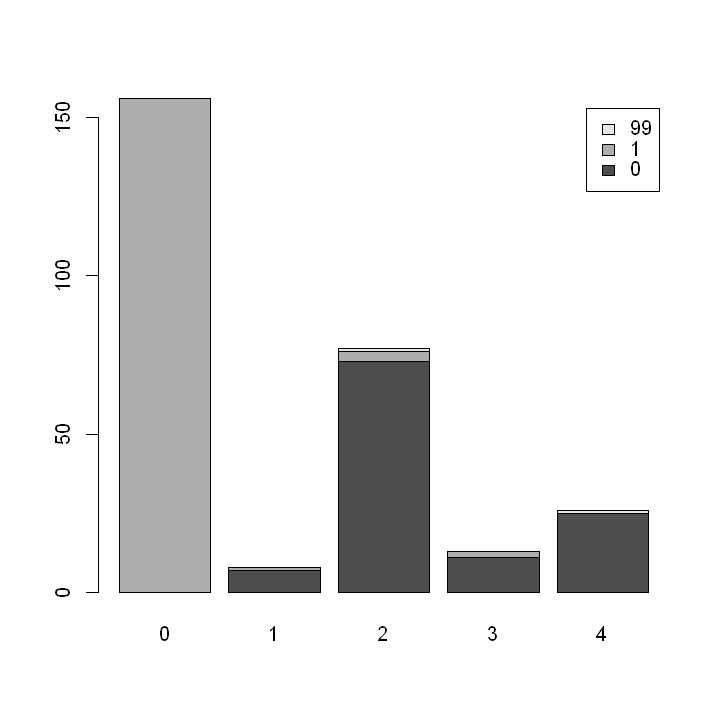

In [31]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(table(clinical_data$DTHVNT, clinical_data$DTHHRDY),legend.text=TRUE)

We can clearly see that this is indeed the case. Therefore, we can consider the `DTHVNT` variable as largely redundant and discard it from our analysis for the remainder of this project.

In [7]:
# Remove the DTHVNT variable
clinical_data$DTHVNT <- NULL

We finally get this preprocessed dataset.

In [33]:
summary(clinical_data)

             SMPLID                  COHORT    SEX          AGE       
 GTEX.111YS.0526:  1   Organ Donor (OPO):143   1:180   Min.   :21.00  
 GTEX.1122O.1126:  1   Postmortem       :137   2:100   1st Qu.:48.00  
 GTEX.1128S.0326:  1                                   Median :56.00  
 GTEX.117XS.0426:  1                                   Mean   :53.64  
 GTEX.117YW.0226:  1                                   3rd Qu.:64.00  
 GTEX.11DXX.0426:  1                                   Max.   :70.00  
 (Other)        :274                                                  
      HGHT            WGHT            BMI           TRISCHD        DTHHRDY
 Min.   :58.00   Min.   : 92.0   Min.   :18.58   Min.   :  18.00   0:156  
 1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33   1st Qu.:  97.25   1:  8  
 Median :68.00   Median :176.4   Median :27.29   Median : 442.00   2: 77  
 Mean   :67.85   Mean   :179.7   Mean   :27.35   Mean   : 476.48   3: 13  
 3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67   3rd Qu.:

### 1.2 How are clinical variables distributed ?

In order to have a visual representation of the distributions of the clinical variables, we now plot histograms and barplots for all the variables we have determined to be relevant.

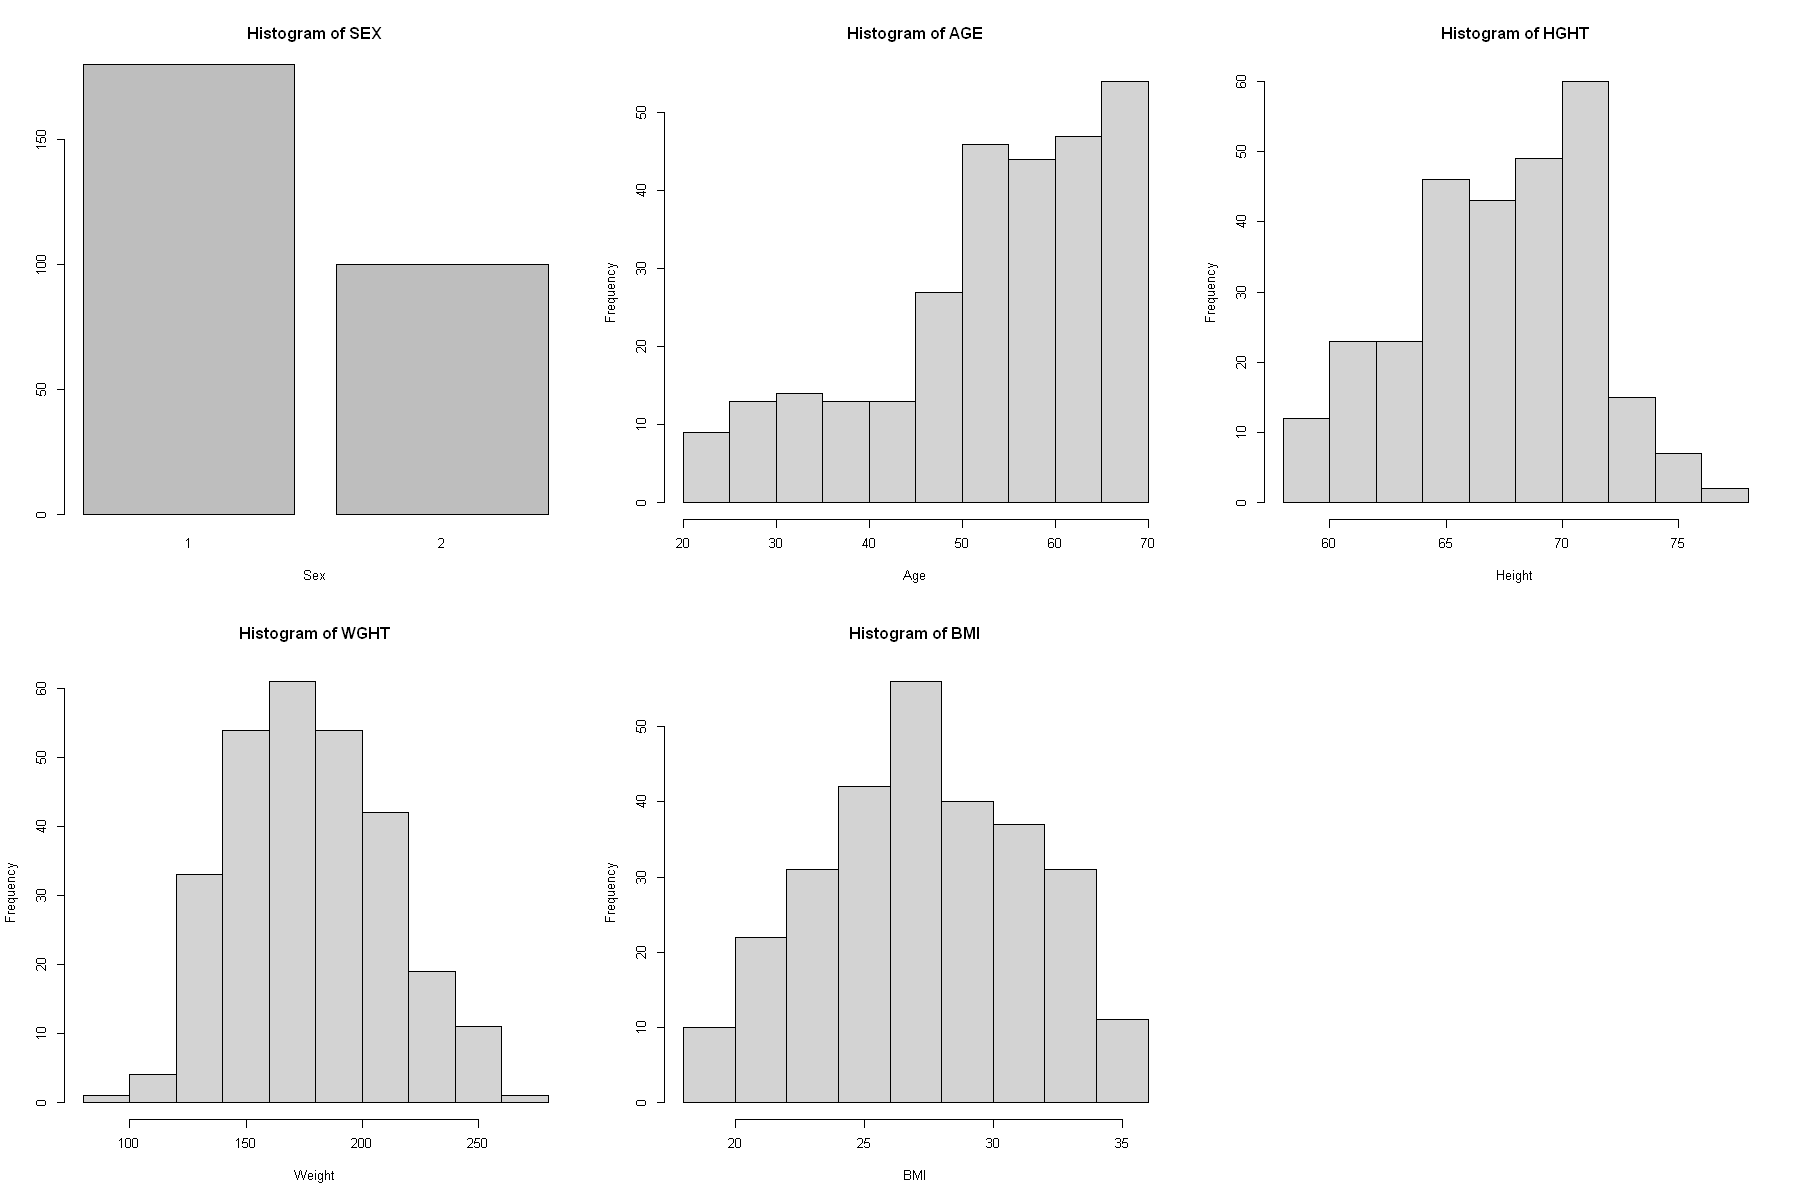

In [34]:
par(mfrow = c(2, 3)) 
options(repr.plot.width=15, repr.plot.height=10)

# Clinical variables
barplot(table(clinical_data$SEX), main="Histogram of SEX", xlab="Sex")
hist(clinical_data$AGE, main="Histogram of AGE", xlab="Age")
hist(clinical_data$HGHT, main="Histogram of HGHT", xlab="Height")
hist(clinical_data$WGHT, main="Histogram of WGHT", xlab="Weight")
hist(clinical_data$BMI, main="Histogram of BMI", xlab="BMI")

Clinical variables 
- Distribution of `SEX` : We have 180 males (1) and 100 females (2) in our dataset of 280 samples which is almost twice more males than females.
- Distribution of `AGE`: We have a bigger proportion of old patients than younger ones as discussed during the presentation of the project.
- Distribution of `HGHT`, `WGHT`, `BMI` : The distribution of these 3 variables is not completly normal because we have 180 men and 100 women in the dataset which shifts the distribution to the right as men are in average taller and heavier than women.   

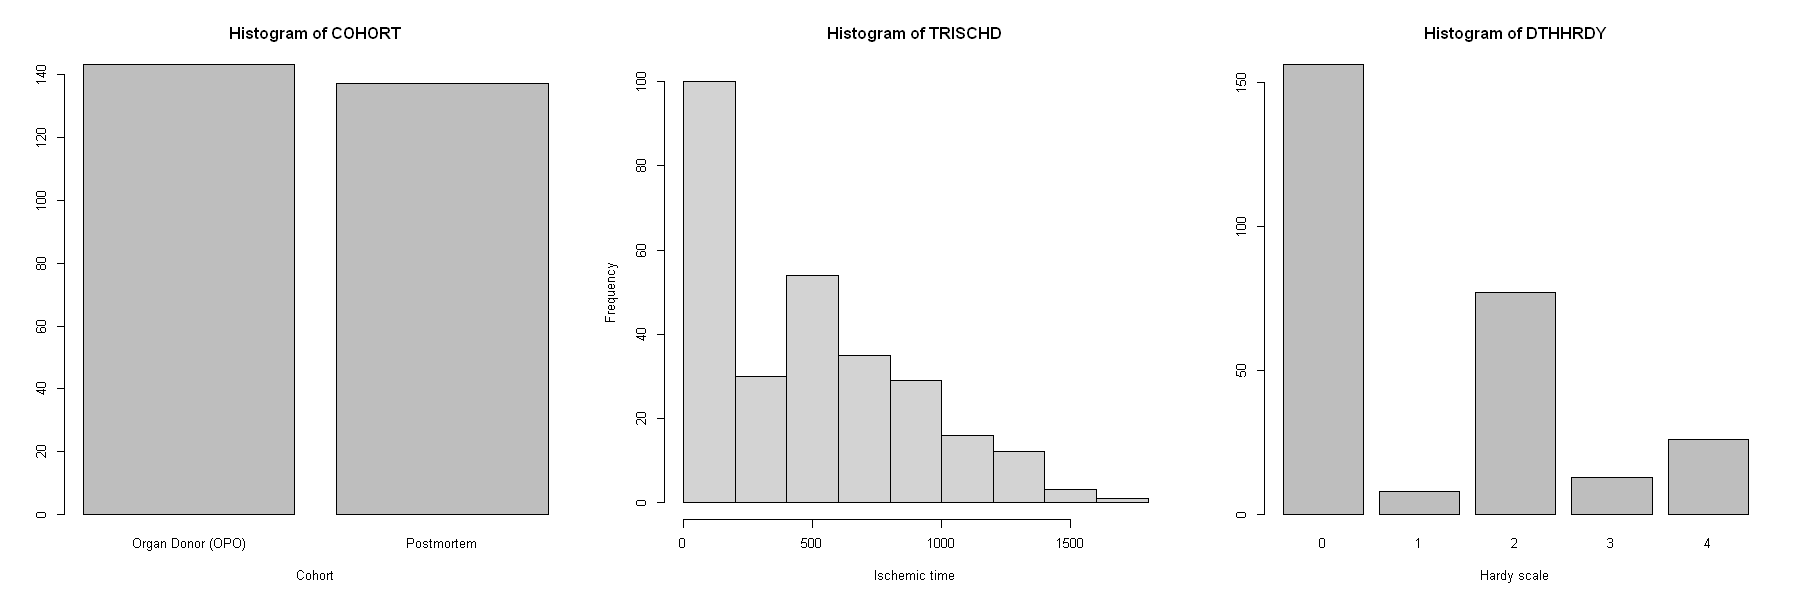

In [35]:
par(mfrow = c(1, 3)) 
options(repr.plot.width=15, repr.plot.height=5)
# Technical variables
barplot(table(clinical_data$COHORT), main="Histogram of COHORT", xlab="Cohort")
hist(clinical_data$TRISCHD, main="Histogram of TRISCHD", xlab="Ischemic time")
barplot(table(clinical_data$DTHHRDY), main="Histogram of DTHHRDY", xlab = "Hardy scale")

Technical variables
- Distribution of `COHORT` : We almost have an equal repartition of Organ donor (OPO) and Post mortem patients.
- Distribution of `TRISCHD` : We can see that we have a large number of people with very small ischemic time and the frequency is more disparate for the other windows of values. We can explain that by looking at the variable COHORT (graph below). As said juste above, we have a quite equal repartition of organ donor and post mortem patients (143 vs 137). The 143 organ donors have the propensity to have lower ischemic time which leads to a large proportion of people with very small ischemic time. In contrast, the ischemic time of post portem patients will be more disparate and spread out across a larger window of ischemic time values.
- Distribution of `DTHHRDY` : The highest circumstances frequency of death is from ventilator case (156) followed by fast death of natural causes (77), then by slow death (26), then by intermediate death (13) and finally by violent and fast death (8)

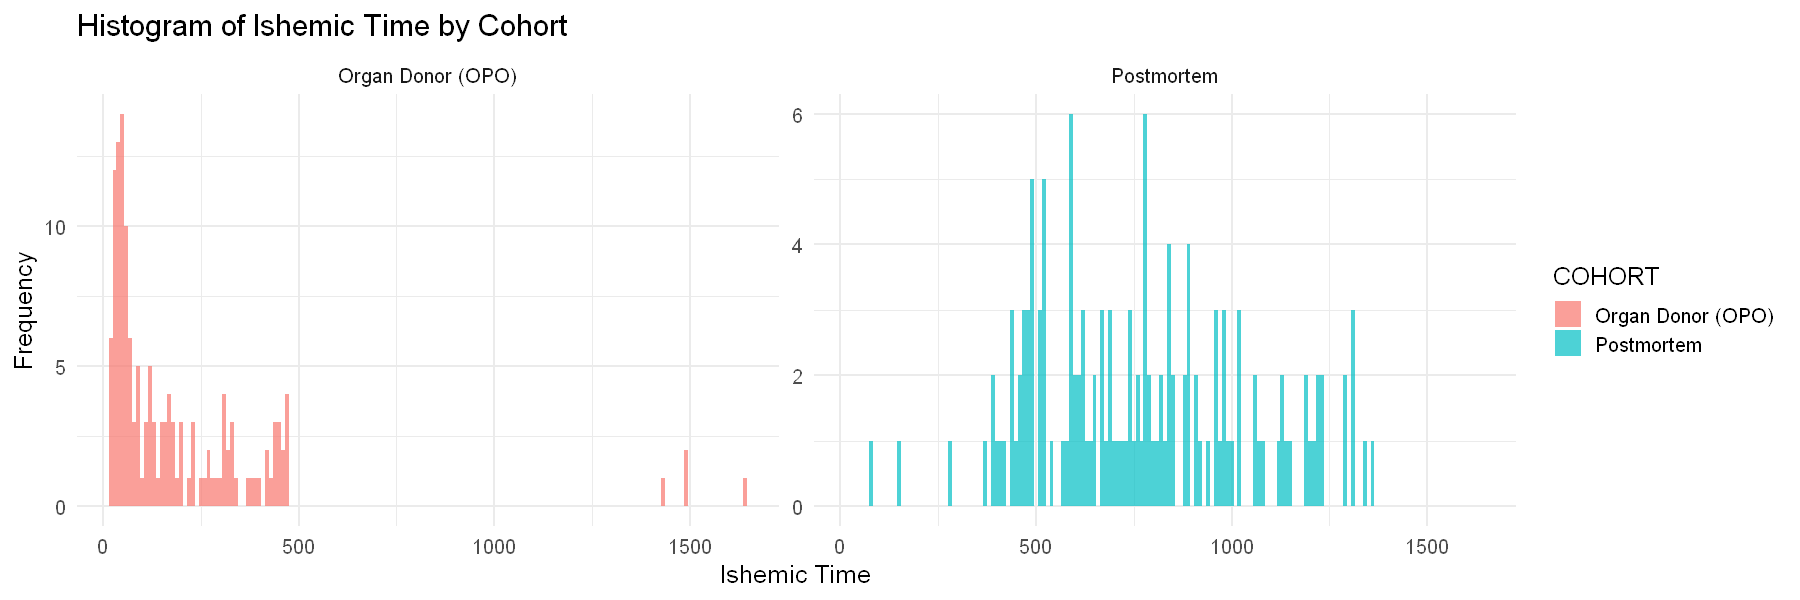

In [36]:
library(ggplot2)
ggplot(clinical_data, aes(x = TRISCHD, fill = COHORT)) +
  geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
  facet_wrap(~ COHORT, scales = "free_y") +
  labs(title = "Histogram of Ishemic Time by Cohort",
       x = "Ishemic Time",
       y = "Frequency") +
  theme_minimal(base_size = 15)

## 1.3 How are clinical variables correlated ?

Now we will explore the pairwise relationships between each variable. Since there are $8$ variables, this means there are $\binom{8}{2}=28$ binary relationships to explore. This a lot so we will try to groups the plots together.

### 1.3.1 Correlations between numerical variables

We can start by exploring the correlation between the 5 numerical variables. 

,AGE,HGHT,WGHT,BMI,TRISCHD
AGE,1.00000000,0.064089264,0.0973484,0.071131909,0.22927245
HGHT,0.06408926,1.000000000,0.6121418,-0.006819023,0.14390524
WGHT,0.09734840,0.612141786,1.0000000,0.780945124,0.11913930
BMI,0.07113191,-0.006819023,0.7809451,1.000000000,0.03324977
TRISCHD,0.22927245,0.143905243,0.1191393,0.033249770,1.00000000


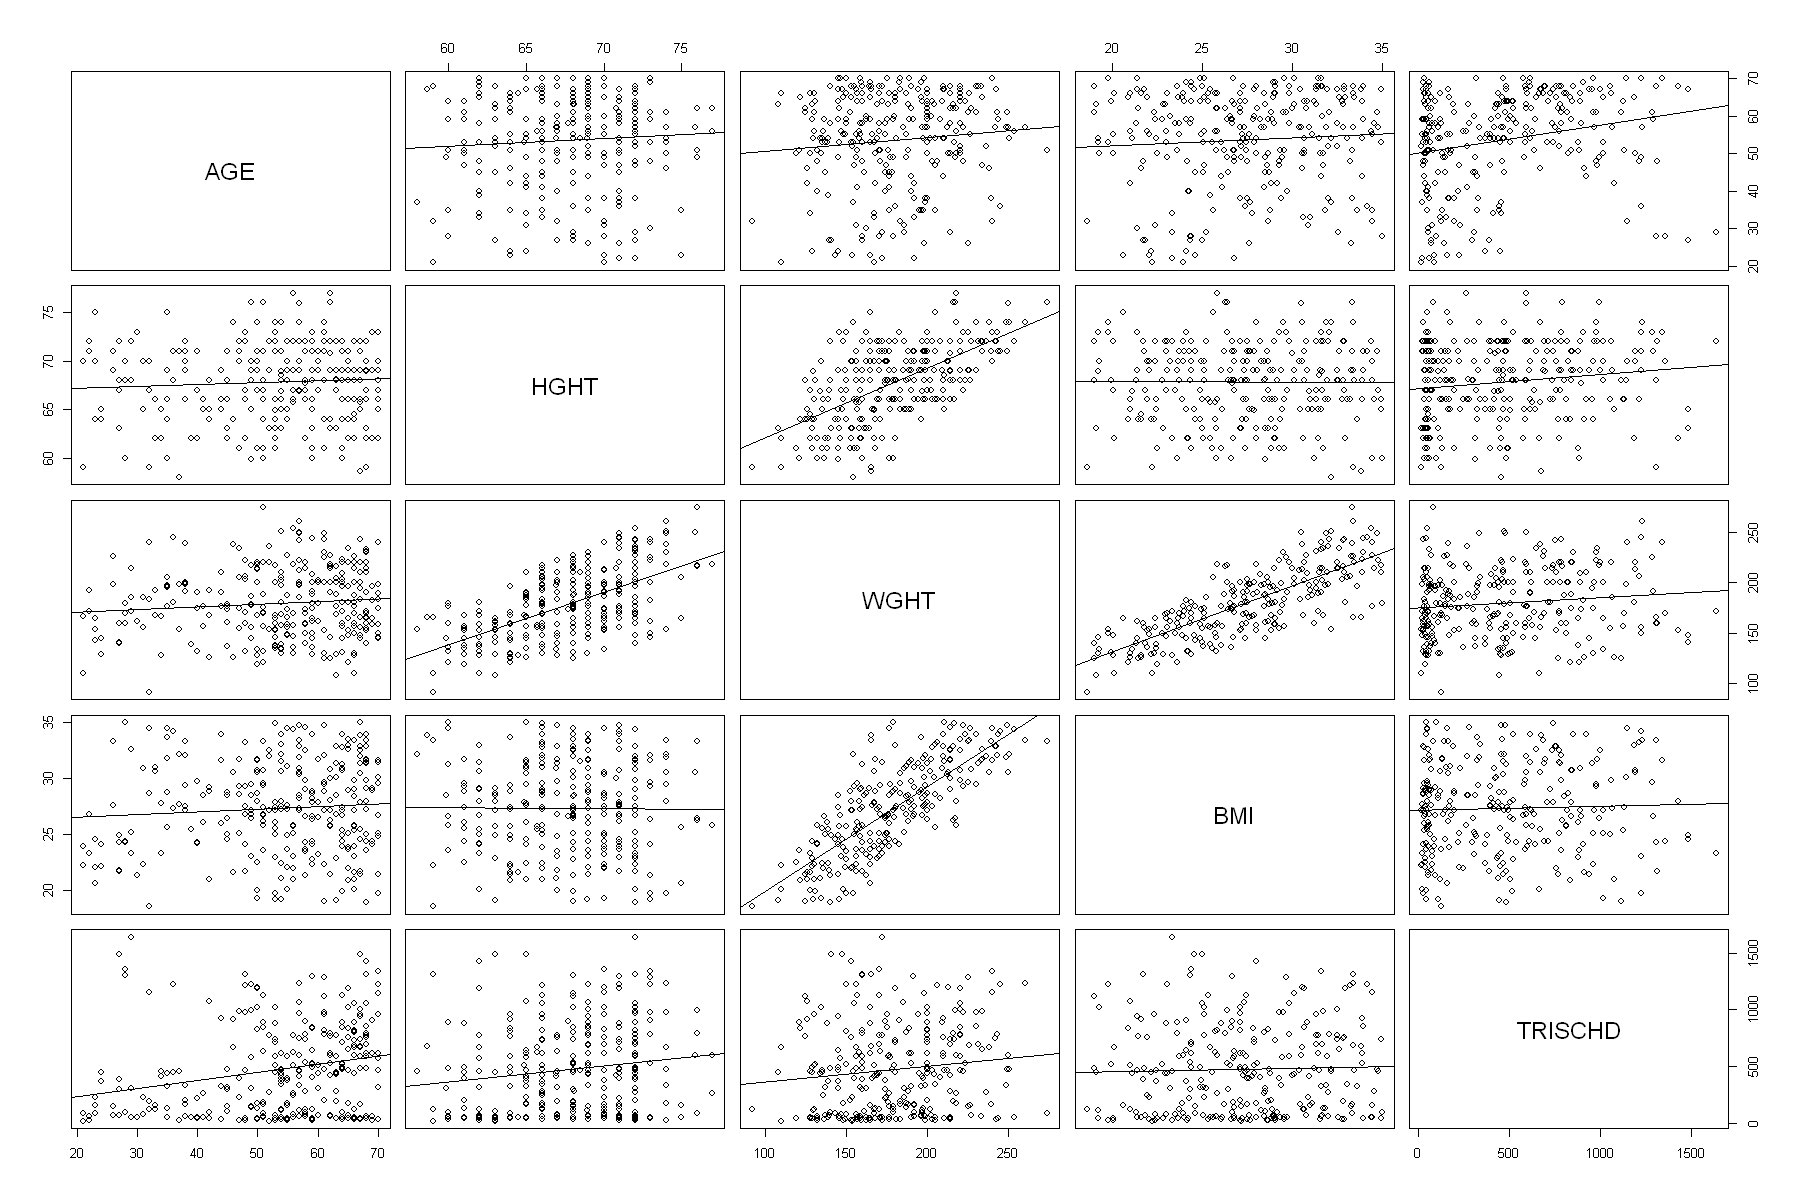

In [37]:
options(repr.plot.width=15, repr.plot.height=10)
# Pearson correlation between numerical variables
cor(clinical_data[c(4:8)])
pairs(~ AGE + HGHT + WGHT + BMI + TRISCHD, data=clinical_data, panel=function(x,y){
  points(x,y)
  linear_regression = lm(y~x)
  linear_regression_line = abline(linear_regression)
})

- `AGE` is a little bit positively correlated to `TRISCHD`.
- `HGHT` is highly positively correlated to `WGHT` which was expected as taller people have a higher tendency to be heavier. `HGHT` is also a bit positively correlated to `TRISCHD`.
- `WGHT` is highly positively correlated to `HGHT` (expected as `HGHT` is highly correlated to `WGHT`) and to `BMI` which is expected as heavier people tend to have a higher `BMI`. `WGHT` is also a little bit positively correlated to `TRISCHD`.
- `BMI` is highly positively correlated to `WGHT` but not at all to `TRISCHD`.
- As said above, `TRISCHD` is a little bit positively correlated to `AGE`, `HGHT` and `WGHT`. It suggests that older, taller and heavier people will tend to have an ischemic time a little bit higher than normal.

### 1.3.2 Correlations between numerical and categorical variables

We want to see if the value of the numerical variables depends somehow on the levels of the categorical variables.

As a reminder, the 5 numerical variables are `AGE`, `HGHT`, `WGHT`, `BMI` and `TRISCHD` and the 3 categorical variables are `SEX`, `COHORT`, `DTHHRDY`.

We used the non parametric Kruskal-Wallis test to assess the "correlation" between the numerical variables and categorical variables. We did not used ANOVA for this purpose because ANOVA requires some conditions of applications (homoscedasticity and normality of the residues) that were not respected. Indeed, the Shapiro-Wilk test, that assesses the normality of the residuals, always returned a pvalue below the alpha treshold of 5% which indicates to reject the null hypothesis of normality. 

#### 1.3.2.1 AGE

Let's start by the `AGE` variable in function of the 3 categorical variables. 

In [38]:
kruskal.test(AGE ~ SEX, data=clinical_data)
kruskal.test(AGE ~ COHORT, data=clinical_data)
kruskal.test(AGE ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592



	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11



	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


for the test `AGE` by `SEX`, the pvalue of the Kruskal-Wallis test is 0.159  which is under the treshold of alpha = 5%. It means that `AGE` is not significantly different between the two sexes. The thinking process is the same for the other tests. It means that `AGE` is significantly different between the two cohorts and between the categories of the hardy scale. 

We can visualize these differences using boxplots. 

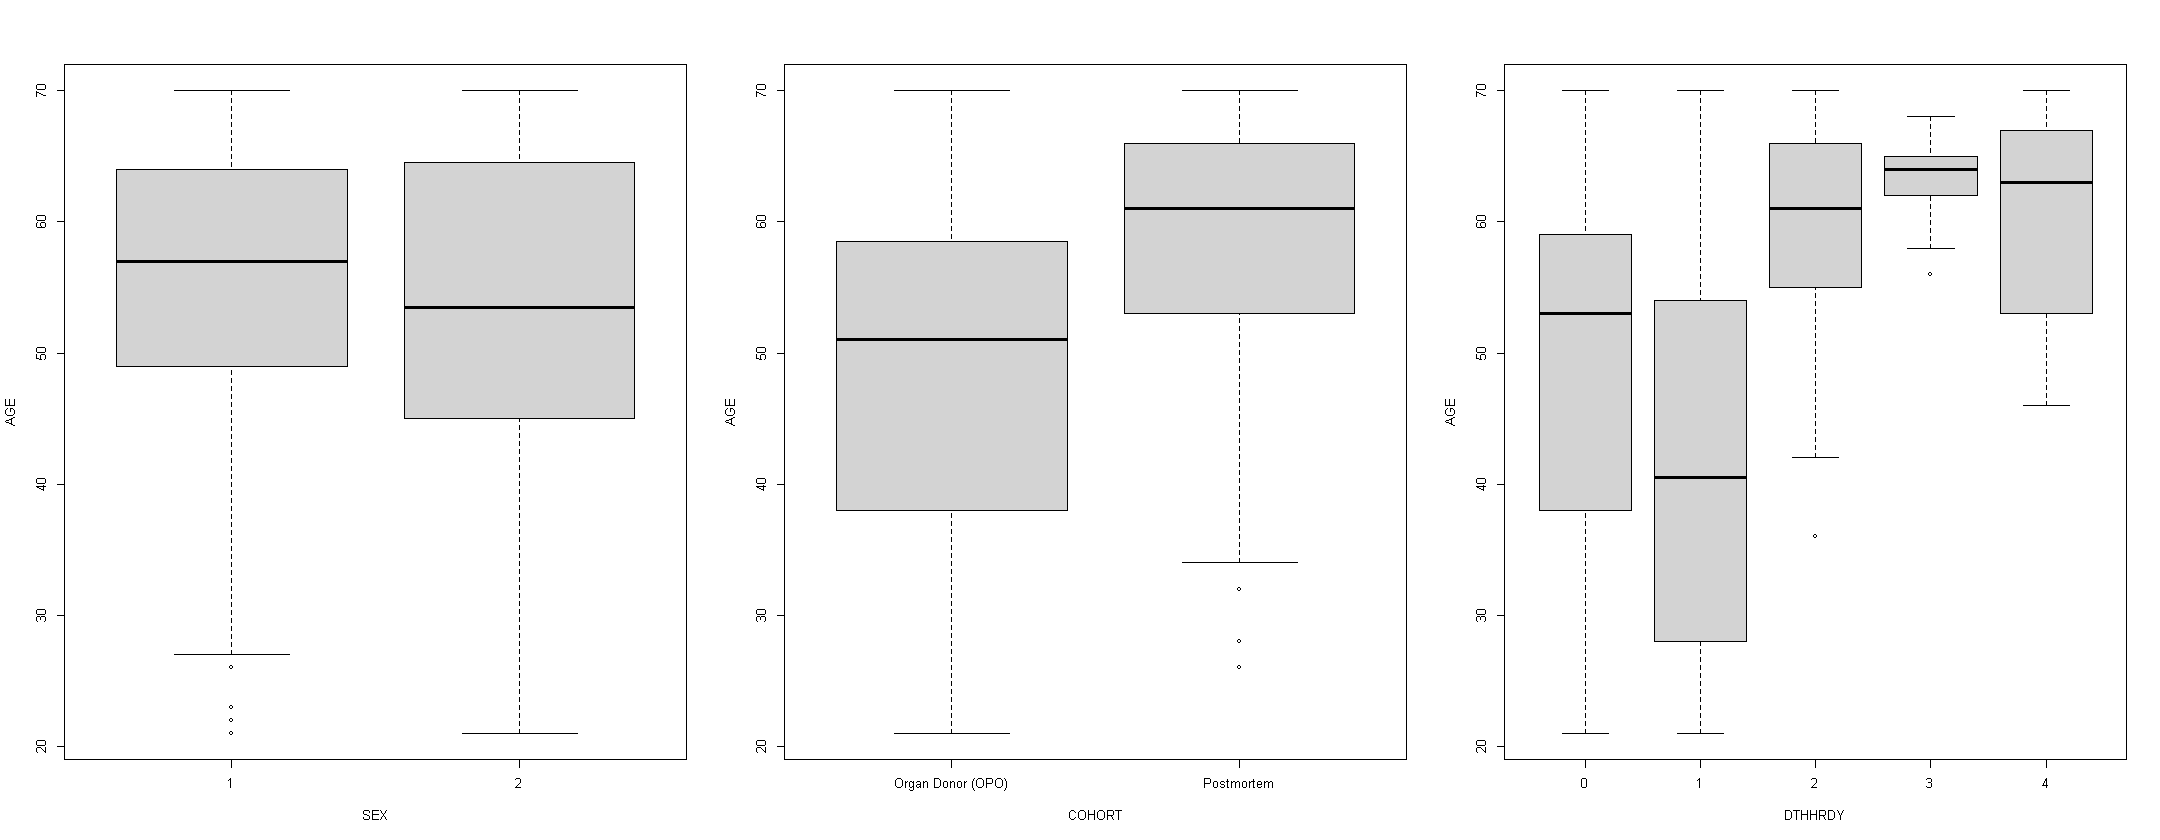

In [46]:
options(repr.plot.width=18, repr.plot.height=7)
par(mfrow = c(1, 3))
boxplot(AGE ~ SEX, data=clinical_data)
boxplot(AGE ~ COHORT, data=clinical_data)
boxplot(AGE ~ DTHHRDY, data=clinical_data)

#### 1.3.2.2 HGHT

In [47]:
kruskal.test(HGHT ~ SEX, data=clinical_data)
kruskal.test(HGHT ~ COHORT, data=clinical_data)
kruskal.test(HGHT ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982



	Kruskal-Wallis rank sum test

data:  HGHT by DTHHRDY
Kruskal-Wallis chi-squared = 12.113, df = 4, p-value = 0.01653


`HGHT` is significantly different between sexes, cohort and hardy scales. 

#### 1.3.2.3 WGHT

In [48]:
kruskal.test(WGHT ~ SEX, data=clinical_data)
kruskal.test(WGHT ~ COHORT, data=clinical_data)
kruskal.test(WGHT ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16



	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107



	Kruskal-Wallis rank sum test

data:  WGHT by DTHHRDY
Kruskal-Wallis chi-squared = 6.6293, df = 4, p-value = 0.1568


`WGHT` is significantly different between sexes and cohort but not between hardy scales. 

#### 1.3.2.4 BMI

In [49]:
kruskal.test(BMI ~ SEX, data=clinical_data)
kruskal.test(BMI ~ COHORT, data=clinical_data)
kruskal.test(BMI ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  BMI by SEX
Kruskal-Wallis chi-squared = 1.089, df = 1, p-value = 0.2967



	Kruskal-Wallis rank sum test

data:  BMI by COHORT
Kruskal-Wallis chi-squared = 0.30004, df = 1, p-value = 0.5839



	Kruskal-Wallis rank sum test

data:  BMI by DTHHRDY
Kruskal-Wallis chi-squared = 0.085412, df = 4, p-value = 0.9991


`BMI` is not significantly different between sexes, cohorts and hardy scales.

#### 1.3.2.5 TRISCHD

In [50]:
kruskal.test(TRISCHD ~ SEX, data=clinical_data)
kruskal.test(TRISCHD ~ COHORT, data=clinical_data)
kruskal.test(TRISCHD ~ DTHHRDY, data=clinical_data)


	Kruskal-Wallis rank sum test

data:  TRISCHD by SEX
Kruskal-Wallis chi-squared = 2.5489, df = 1, p-value = 0.1104



	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  TRISCHD by DTHHRDY
Kruskal-Wallis chi-squared = 176.5, df = 4, p-value < 2.2e-16


`TRISCHD` is significantly different between cohorts and hardy scales but not between the two sex. 

## 1.3.3 Correlations between categorical variables

The 3 categorical variables are `SEX`, `COHORT` and `DTHHRDY`.

To evaluate whether the categorical variables are independant of each other, we run a Pearson's chi-squared test and Fisher's exact test for all pairs of categorical variables i.e to conclude if they are "correlated" to each other. They are 2 + 1 = 3 possible combinations to compare the categorical variables.

In [51]:
chisq.test(clinical_data$COHORT, clinical_data$SEX)
chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY)
chisq.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Pearson's Chi-squared test with Yates' continuity correction

data:  clinical_data$COHORT and clinical_data$SEX
X-squared = 0.73176, df = 1, p-value = 0.3923


Warning message in chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  clinical_data$COHORT and clinical_data$DTHHRDY
X-squared = 225.5, df = 4, p-value < 2.2e-16


Warning message in chisq.test(clinical_data$SEX, clinical_data$DTHHRDY):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  clinical_data$SEX and clinical_data$DTHHRDY
X-squared = 13.111, df = 4, p-value = 0.01075


In [52]:
fisher.test(clinical_data$COHORT, clinical_data$SEX)
fisher.test(clinical_data$COHORT, clinical_data$DTHHRDY)
fisher.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$SEX
p-value = 0.3827
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4647701 1.3157458
sample estimates:
odds ratio 
 0.7833011 



	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$DTHHRDY
p-value < 2.2e-16
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  clinical_data$SEX and clinical_data$DTHHRDY
p-value = 0.008351
alternative hypothesis: two.sided


The two tests agree on concluding that the variables `COHORT` and `SEX` are independant while `COHORT` and `DTHHRDY` are not, as well as `SEX` and `DTHHRDY`.

We can visualize all the correlations using the `corrplot` package. However, it does not perfectly match the result we got for the different test. For example, `SEX` and `DTHHRDY`are significantly correlated using the Pearson's Chi-squared and Fisher's Exact Test which cannot be seen with the corrplot. 

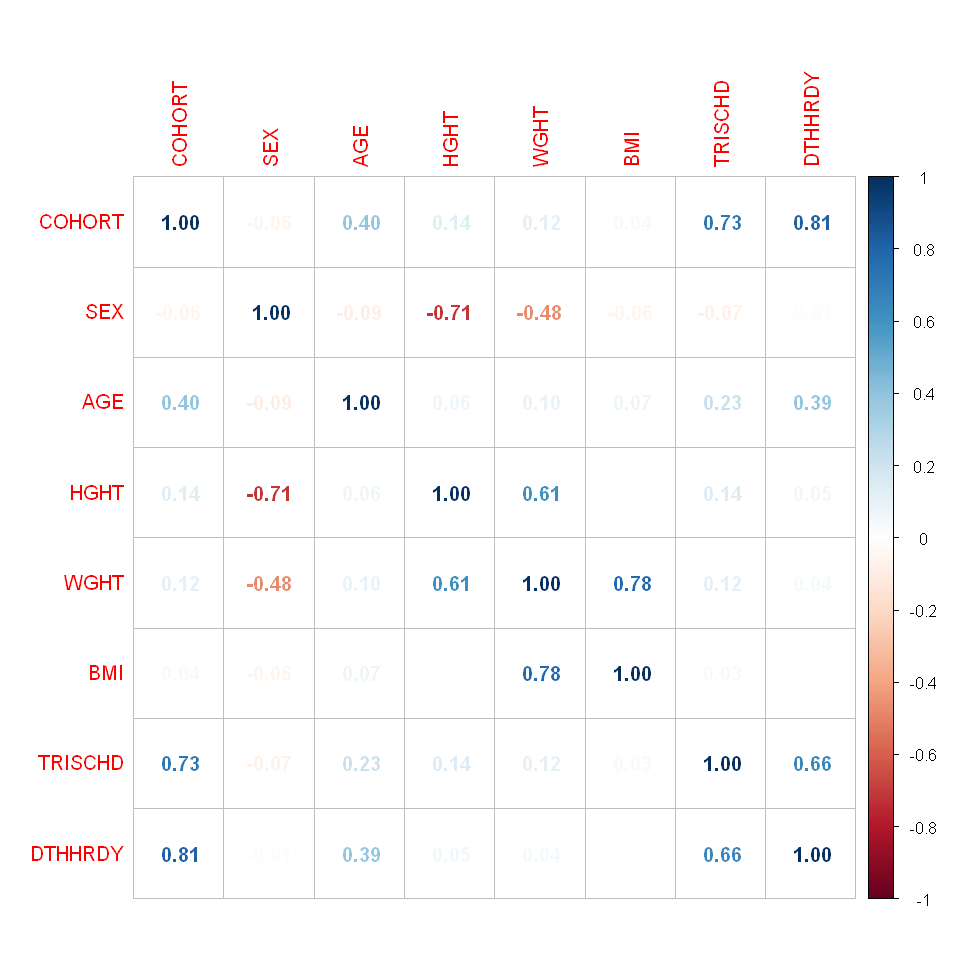

In [91]:
library("corrplot")
options(repr.plot.width=8, repr.plot.height=8)
clinical_data_numeric <- clinical_data
clinical_data_numeric$SEX = as.numeric(clinical_data$SEX)
clinical_data_numeric$COHORT = as.numeric(clinical_data$COHORT)
clinical_data_numeric$DTHHRDY = as.numeric(clinical_data$DTHHRDY)
M = cor(clinical_data_numeric[,c(2,3,4,5,6,7,8,9)])
corrplot(M, method = 'number')

Here is a final summary of the correlations for each variable

Clinical variables : 

- `AGE` is correlated to `TRISCHD`, `COHORT` and `DTHHRDY`
- `SEX` is correlated to `HGHT`, `WGHT` and `DTHHRDY`
- `HGHT` is correlated to `WGHT`,  `SEX`, `TRISCHD`, `COHORT` and `DTHHRDY`
- `WGHT`  is correlated to `HGHT`, `BMI`, `SEX`, `TRISCHD` and `COHORT`
- `BMI` is correlated to `WGHT`

Technical variables : 

- `TRISCHD` is correlated to `AGE`, `HGHT`, `WGHT`, `COHORT` and `DTHHRDY`
- `COHORT` is correlated to `AGE`, `HGHT`, `WGHT`, `TRISCHD`and `DTHHRDY`
- `DTHHRDY` is correlated to `AGE`, `HGHT`, `TRISCHD` and `COHORT`

These correlations are especially important to determine the technical variables cofounding the clinical variables (next section).

## 1.4 Are there technical variables cofounding demographic/health variables ?

We need to see if the 5 clinical variables `AGE`, `SEX`, `HGHT`, `WGHT` and `BMI` are cofounded by the 3 technical variables `COHORT`, `TRISCHD` and `DTHHRDY` to normalize the further statistical analysis of the concerned clinical variable. 

We will start by plotting the four continous clinical variables `AGE`, `HGHT`, `WGHT` and `BMI` in function of `TRISCHD` (only continous technical variable) colored by `COHORT` and then by `DTHHRDY`. It gives a total of 8 combinations of plots.

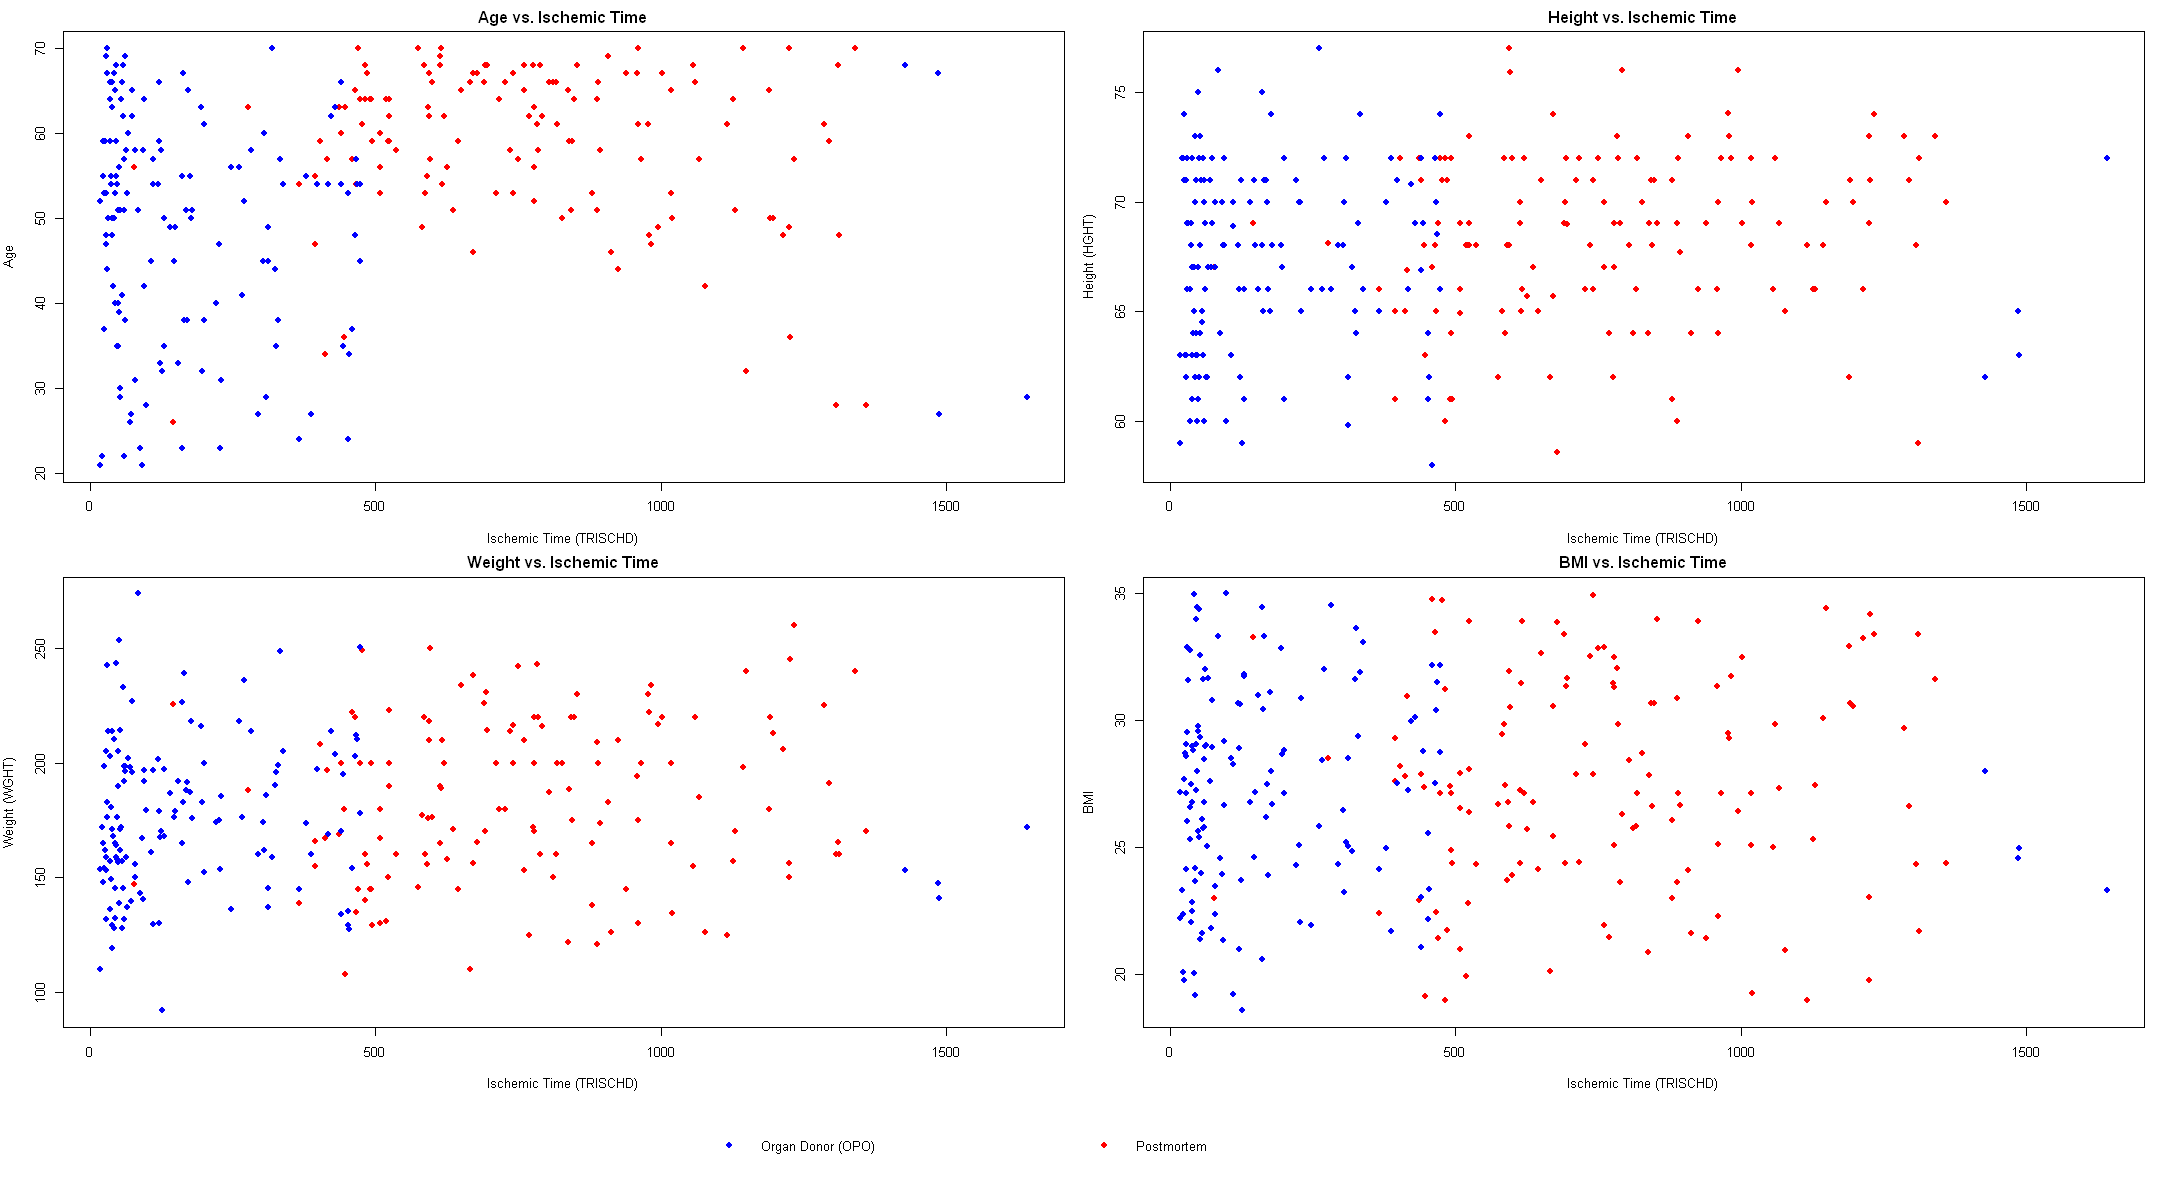

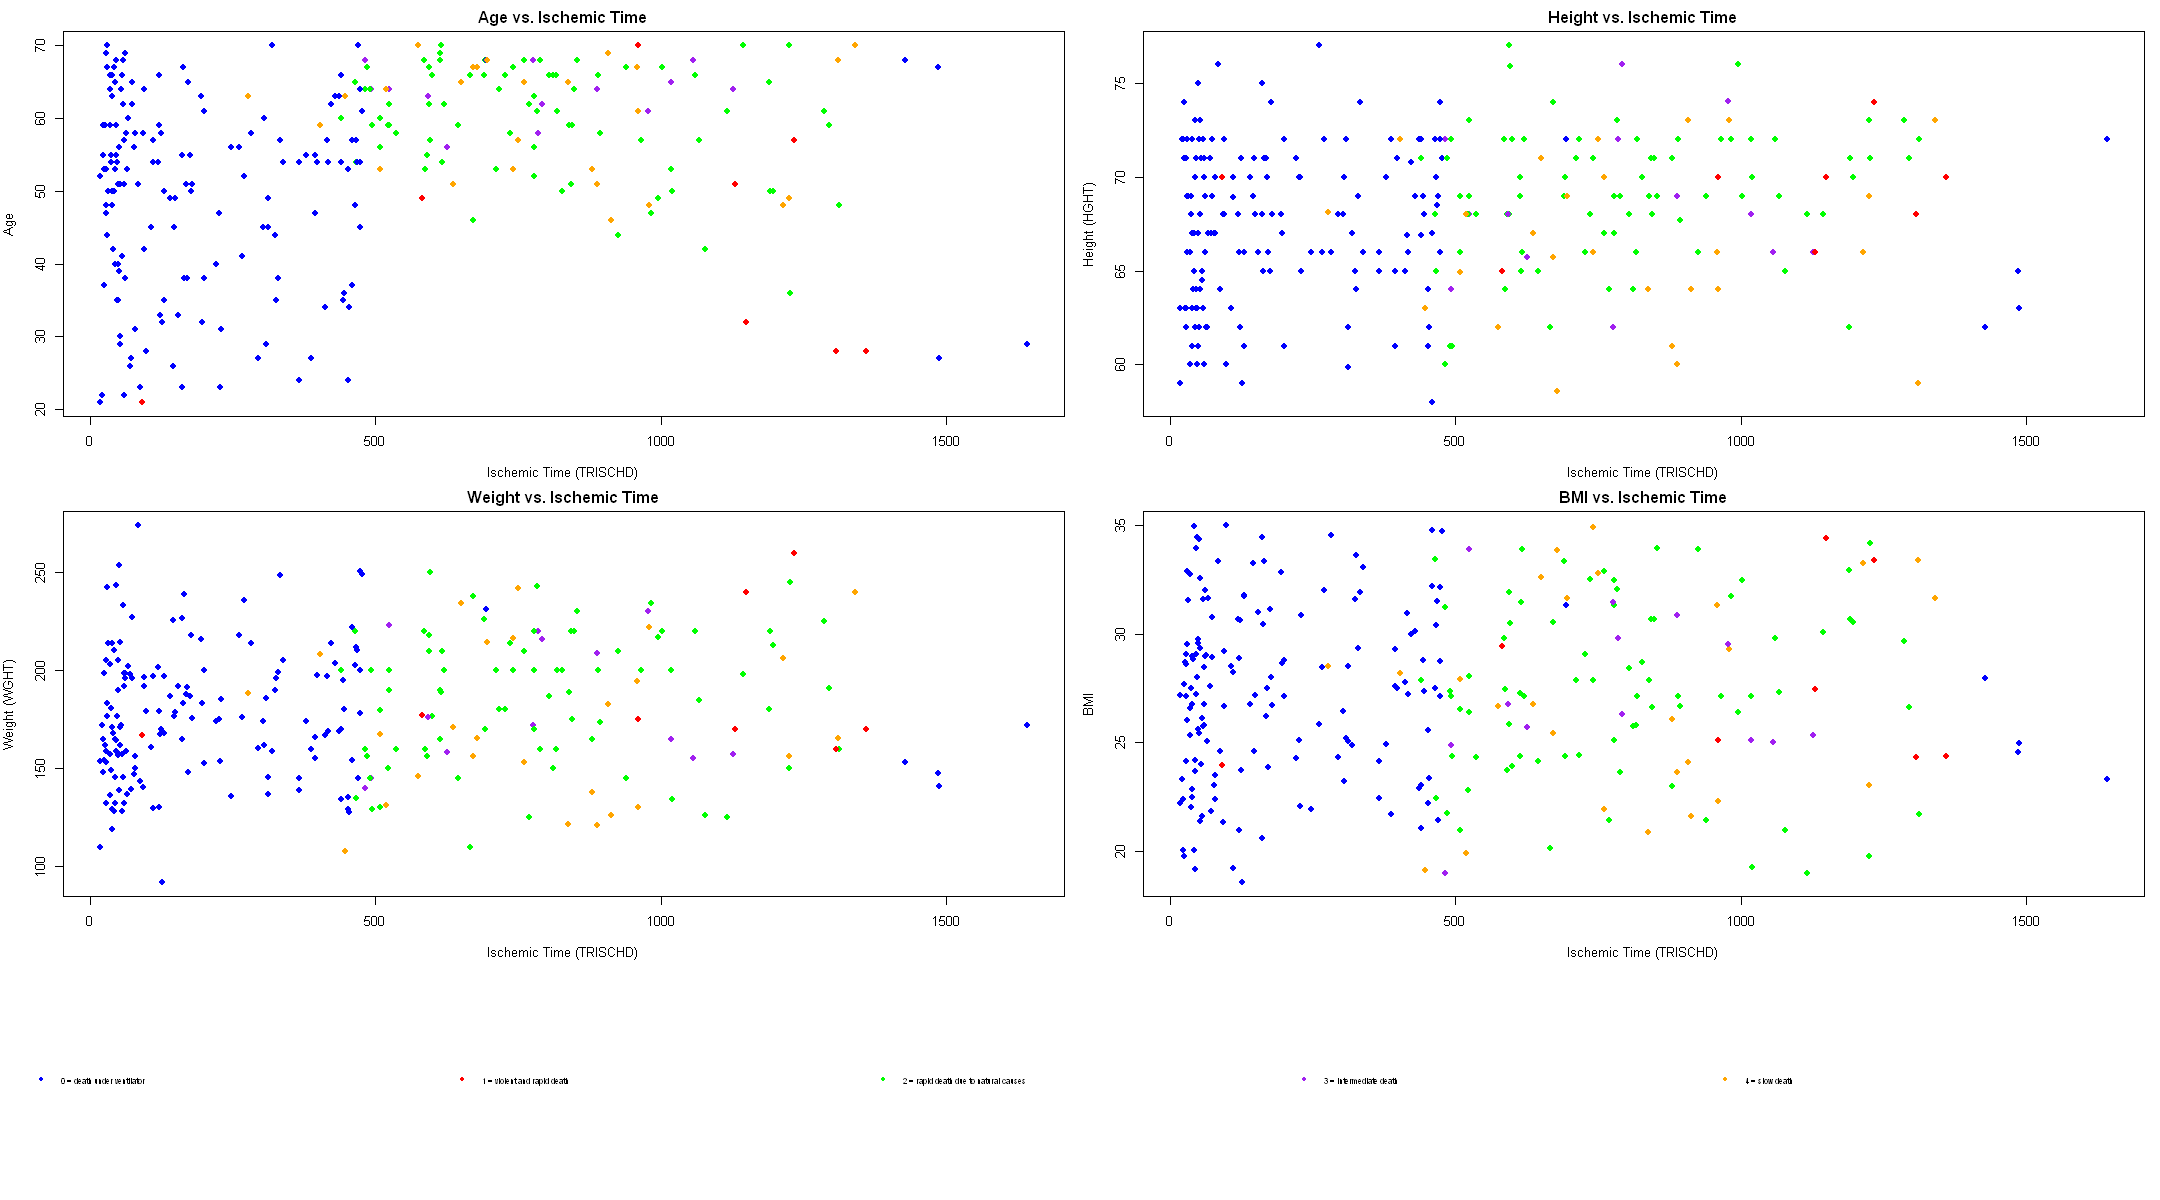

In [101]:
##### CHAT GPT

options(repr.plot.width=18, repr.plot.height=10)

# Define colors for cohorts
colors <- c("Cohort1" = "blue", "Cohort2" = "red")

# Define layout: 2x2 plots + 1 row for legend
layout(matrix(c(1, 2, 3, 4, 5, 5), nrow = 3, byrow = TRUE), heights = c(1, 1, 0.2))

# Plot 1: AGE vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$AGE, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Age", 
     main = "Age vs. Ischemic Time")

# Plot 2: HGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$HGHT, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Height (HGHT)", 
     main = "Height vs. Ischemic Time")

# Plot 3: WGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$WGHT, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Weight (WGHT)", 
     main = "Weight vs. Ischemic Time")

# Plot 4: BMI vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$BMI, 
     col = colors[clinical_data$COHORT], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "BMI", 
     main = "BMI vs. Ischemic Time")

# Plot 5: Legend
par(mar = c(0, 0, 0, 0))
plot.new()
legend("center", legend = levels(clinical_data$COHORT), col = colors, pch = 16, horiz = TRUE, bty = "n")



options(repr.plot.width=18, repr.plot.height=10)

# Define colors for DTHHRDY
colors <- c("0" = "blue", "1" = "red", "2" = "green", "3" = "purple", "4" = "orange")

# Define layout: 2x2 plots + 1 row for legend
layout(matrix(c(1, 2, 3, 4, 5, 5), nrow = 3, byrow = TRUE), heights = c(1, 1, 0.5))

# Plot 1: AGE vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$AGE, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Age", 
     main = "Age vs. Ischemic Time")

# Plot 2: HGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$HGHT, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Height (HGHT)", 
     main = "Height vs. Ischemic Time")

# Plot 3: WGHT vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$WGHT, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "Weight (WGHT)", 
     main = "Weight vs. Ischemic Time")

# Plot 4: BMI vs. TRISCHD
par(mar = c(4, 4, 2, 1))
plot(clinical_data$TRISCHD, clinical_data$BMI, 
     col = colors[as.character(clinical_data$DTHHRDY)], 
     pch = 16, 
     xlab = "Ischemic Time (TRISCHD)", 
     ylab = "BMI", 
     main = "BMI vs. Ischemic Time")

# Plot 5: Legend
par(mar = c(0, 0, 0, 0))
plot.new()
legend("center", legend = c("0 = death under ventilator", 
                            "1 = violent and rapid death", 
                            "2 = rapid death due to natural causes", 
                            "3 = intermediate death", 
                            "4 = slow death"), 
       col = colors, pch = 16, horiz = TRUE, bty = "n", cex = 0.6)

Using these plots and the correlations from section 1.3, we find the following technical cofounded variables :

Clinical variables (demographic/health variables) : 

- `AGE` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `SEX` is cofounded by `DTHHRDY`
- `HGHT` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `WGHT` is cofounded by `TRISCHD` and `COHORT`
- `BMI` is not cofounded by any technical variable. 

Concretly, it means that we will need to adjust (i.e. normalize) the clinical variables with these cofounded technical variables during the statistical analysis of the next sections. 

## Question 2. Clinical data vs morphology

In [8]:
# Read the TSV file into a data frame
morphological_counts <- read.table("Aorta/morphological_counts_lunit_dino.tsv", 
                           sep = "\t", header=TRUE)

row.names(morphological_counts) <- morphological_counts$SMPLID
morphological_counts <- morphological_counts[-1]
#transpose the morpholigical counts (samples as columns, clusters as rows) to have the compatible count format for DGE
morphological_counts <- t(morphological_counts)
head(morphological_counts, 3)
dim(morphological_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102


[1]  32 280

The morphological count matrix has the correct form with samples (patient ID) as columns and morphological cluster counts as rows. The dimensions are also correct as we have 32 morphological clusters and 280 samples.

### 2.1 Compute systematically associations between clinical variables and morphological cluster counts.

The 5 demographics/health variables are `AGE`, `SEX`, `HGHT`, `WGHT` and `BMI`. The 3 technical variables are `COHORT`, `TRISCHD`, `DTHHRDY`.

The goal of this section is to compare the magnitude of the associations of the different clinical variables with morphology. For that, we will perform differential morphological cluster expression (DME) with edgeR. Note that we used edgeR to realize the differential expression analysis for question 2 and DESeq2 for question 3 so that we can explore the two methods. 

Let's define a function `DME`  that allows to perform an automatized procedure of differential morphological expression.

In [12]:
library(edgeR)

DME <- function(clinical_variable){

    # Create the differential expression data structure used by edgeR (DGEList)
    DGE_list <- DGEList(counts = morphological_counts, group = clinical_data[[clinical_variable]])
    
    # Filter lowly expressed morphological clusters
    keep <- filterByExpr(DGE_list)
    DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]
    
    # Normalize the data
    DGE_list <- normLibSizes(DGE_list)

    # Create a design matrix
    formula <- as.formula(paste("~clinical_data$", clinical_variable))
    design <- model.matrix(formula)
    
    #Estimate the dispersion
    DGE_list <- estimateDisp(DGE_list, design)

    # Fit the model and test for differential expression
    fit <- glmQLFit(DGE_list,design)
    qlf <- glmQLFTest(fit,coef=2)

    # return the table that contains the differentially expressed morphological clusters. We also remove the logCPM just to have a clearer print for the results.
    return (topTags(qlf, n = 32)$table[ ,-2])
}

Le chargement a nécessité le package : limma



In [90]:
# Create a list DME that will contain the results of differential morphological expression
DME_clinical_variable <- list()

# Iterate through each clinical variables and apply the function DME on them
for (var in colnames(clinical_data[,-1])){
    DME_clinical_variable[[var]] <- DME(var)
}
# Print the final results of the 8 DME
print(DME_clinical_variable)

$COHORT
                                  logFC            F       PValue          FDR
Mophological.cluster.G4_28 -0.530987049 3.379524e+01 1.653581e-08 2.618369e-07
Mophological.cluster.G4_18  1.654992542 3.367730e+01 1.745579e-08 2.618369e-07
Mophological.cluster.G4_14  1.431838659 3.062862e+01 7.138854e-08 7.138854e-07
Mophological.cluster.G4_1  -1.390385322 2.819617e+01 2.224324e-07 1.668243e-06
Mophological.cluster.G4_30  0.811222003 2.573890e+01 7.096961e-07 4.258177e-06
Mophological.cluster.G4_2  -1.073094984 2.461767e+01 1.210140e-06 6.050701e-06
Mophological.cluster.G4_0   1.315591065 2.257304e+01 3.225597e-06 1.382399e-05
Mophological.cluster.G4_9  -0.628016370 2.080725e+01 7.581662e-06 2.843123e-05
Mophological.cluster.G4_4   1.314871452 2.008645e+01 1.077061e-05 3.590202e-05
Mophological.cluster.G4_12  1.530715841 1.957411e+01 1.383483e-05 4.150450e-05
Mophological.cluster.G4_6   1.601564628 1.911839e+01 1.729588e-05 4.717058e-05
Mophological.cluster.G4_25 -1.377063047 1.74

Note that the output of `$DTHHRDY` is not complete as it only shows the contrast between level 0 et level 1 of hardy scale (see later `section 2.2.3`) and `DTHHRDY` has 5 levels. 

Note that the number of morphological cluster (number of rows) in the final differentially expressed can be less than 32 because of the step of filtering lowly expressed morphological clusters meaning that every morphological clusters are not every time present in the final table.

In [29]:
# Example with COHORT, SEX and AGE 
print(nrow(DME_clinical_variable$COHORT))
print(nrow(DME_clinical_variable$SEX))
print(nrow(DME_clinical_variable$AGE))

[1] 30
[1] 31
[1] 32


### 2.2 Discuss the association with technical variables

The 3 technical variables are `COHORT`, `TRISCHD`, `DTHHRDY`. The main idea is to see which morpholigical clusters are differentially expressed for the 3 technical variables.

#### 2.2.1 Association between the `COHORT` variable and morphological clusters 

The goal is to see which morphological clusters is differentially expressed between the two levels of the `COHORT` variable (Organ donor and Post mortem).

We can use a volcanoplot to visualize the significant upregulated and downregulated morphological clusters. Note that 
the upregulation and downregulation is arbitrary because it depends of the contrast used for the differential expression. In our case, the contrast is "Organ donor-Post mortem". Hence, an upregulated morphological cluster means that his expression is upregulated in the Organ donor cohort compared to the Post mortem cohort (and reciprocally for down regulated morphological cluster). We considered arbitrarly that a morphological cluster is upregulated if the log2FC is superior or equal to 1 and if the FDR (p-adjusted value) is inferior or equal to 0.05 (-log10FDR > 1.3) and same for downregulated but with log2FC inferior or equal to 1.

Warning message:
"Removed 15 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


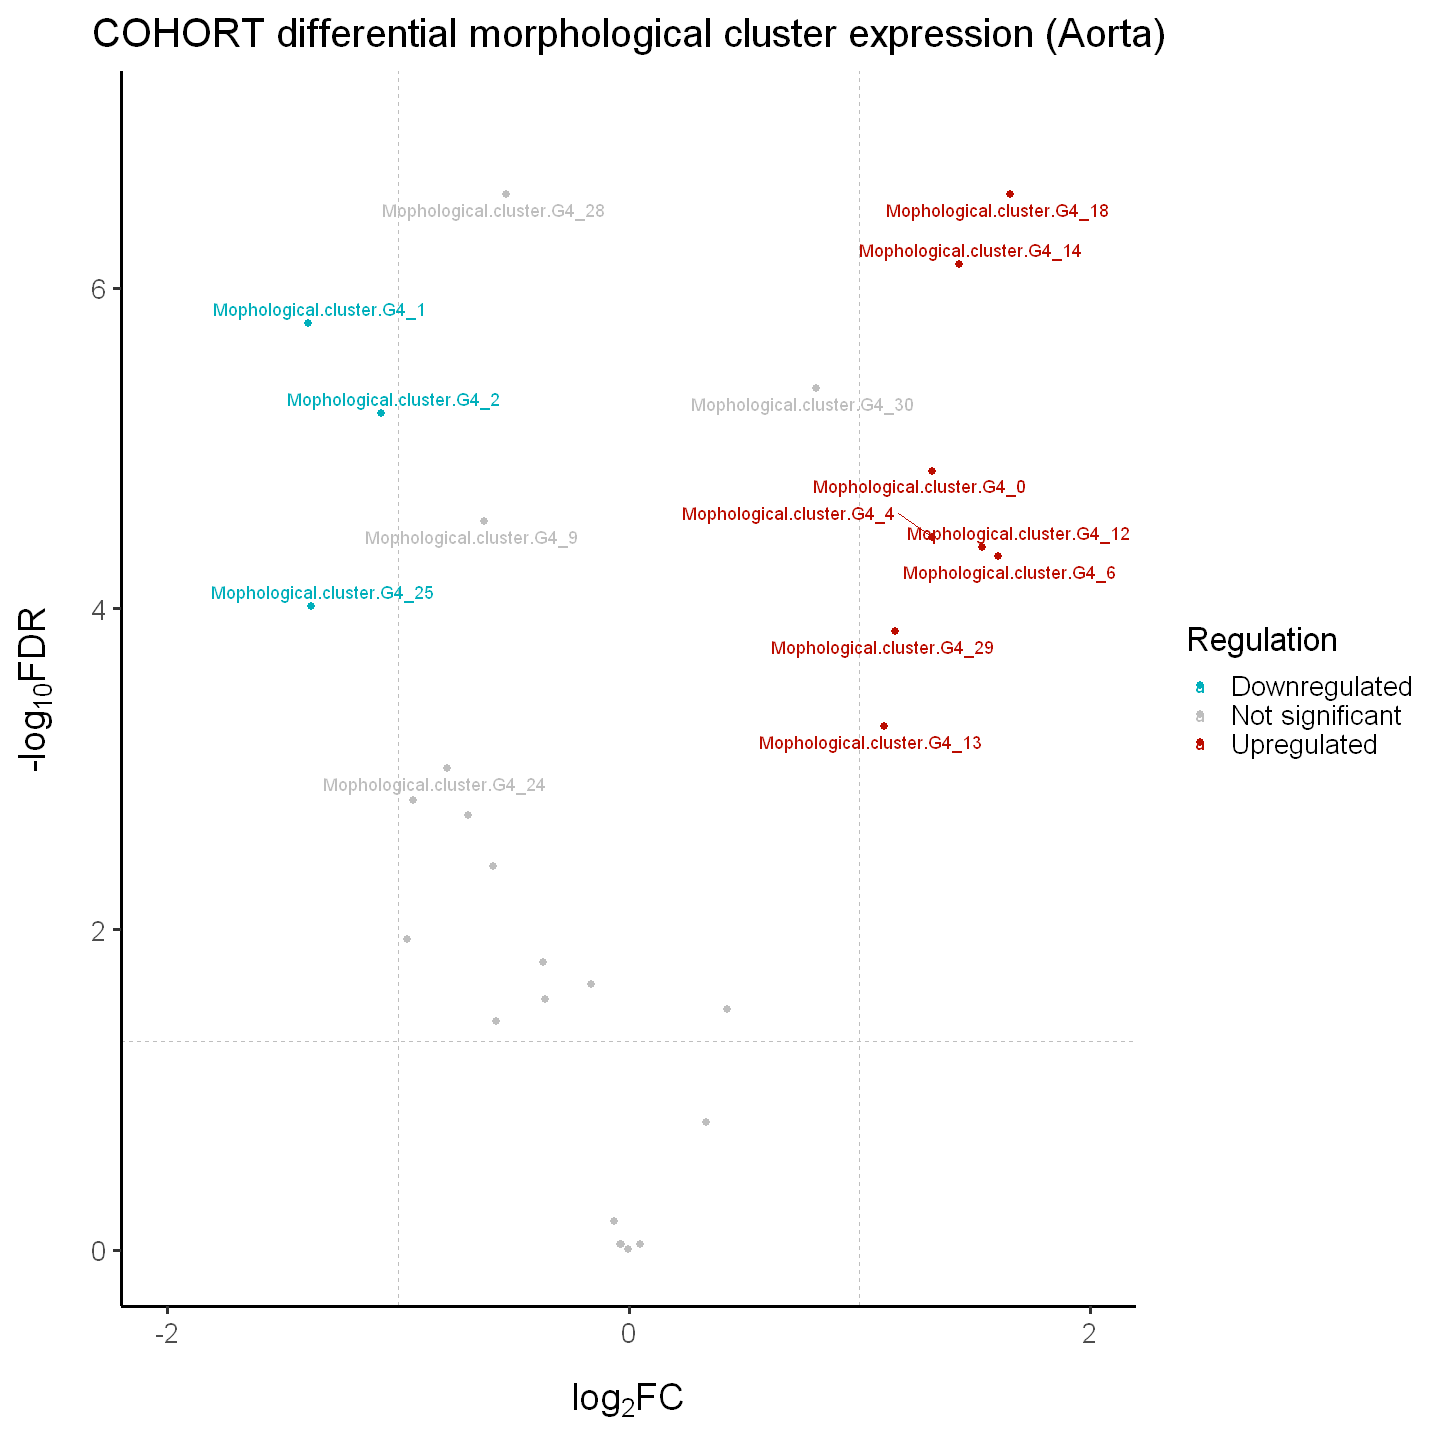

In [35]:
#Source : https://biostatsquid.com/volcano-plots-r-tutorial/

library(tidyverse) # includes ggplot2, for data visualisation. dplyr, for data manipulation.
library(RColorBrewer) # for a colourful plot
library(ggrepel) # for nice annotations


##### COHORT volcanoplot
d_topTags <- DME_clinical_variable$COHORT
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)

# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 7), xlim = c(-2, 2)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('COHORT differential morphological cluster expression (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels

We can see that for example, morphological cluster 1, 2 and 25 are significantly downregulated in the organ donor cohort (compared to the post mortem cohort) and cluster 18, 14 and 0 are significantly upregulated in the organ donor cohort. Note again that the tresholds for log2FC and -log10FDR are completly arbitrary. For example, if we took a less stringent log2FC treshold, cluster 28 could have been considered significant as it has a very low -log10FDR. 

#### 2.2.2 Association between the `TRISCHD` variable and morphological clusters

Here, the difference with the `COHORT` variable is that `TRISCHD` is a continuous variable and not a categorical variable meaning that the interpretation is different. 

In [39]:
print(DME_clinical_variable$TRISCHD)

                                   logFC           F       PValue          FDR
Mophological.cluster.G4_18  2.235436e-03 41.25472894 5.644834e-10 1.806347e-08
Mophological.cluster.G4_28 -6.669062e-04 31.77883876 4.182630e-08 6.692209e-07
Mophological.cluster.G4_6   2.231362e-03 23.41272654 2.152558e-06 2.296061e-05
Mophological.cluster.G4_4   1.847704e-03 22.80615397 2.881201e-06 2.304961e-05
Mophological.cluster.G4_1  -1.478969e-03 20.81698299 7.541742e-06 4.826715e-05
Mophological.cluster.G4_14  1.541873e-03 18.89566065 1.928527e-05 1.028548e-04
Mophological.cluster.G4_2  -1.026983e-03 14.75450604 1.512222e-04 6.913016e-04
Mophological.cluster.G4_9  -6.517324e-04 14.45431895 1.759443e-04 7.020249e-04
Mophological.cluster.G4_24 -1.079840e-03 14.22617693 1.974445e-04 7.020249e-04
Mophological.cluster.G4_3  -1.237020e-03 12.19637349 5.554961e-04 1.777588e-03
Mophological.cluster.G4_25 -1.374355e-03 11.10434400 9.760057e-04 2.839289e-03
Mophological.cluster.G4_30  6.511762e-04  6.99901352

Let's take cluster 18 as an example for the interpretation of log2FC. A log2FC of 2.235436e-03 means that the expression of the morphological cluster should increase by 2^2.235436e-03 for each additionnal value of `TRISCHD`. It is exactly the same principle as a linear relationship between 2 variables. Of course, the same thinking process can applied to the other clusters and for the other continuous variables. 

As a consequence, it does not really make sense to make a volcanoplot to show the visualize result because volcano plot allows to see the differentially expression between 2 groups.

#### 2.2.3 Association between the `DTHHRDY` variable and morphological clusters

`DTHHRDY` is a factor variable like `COHORT` but the main difference is that it has 5 levels instead of only 2 which makes the procedure more complicated because we need to make pairwise comparisons (using contrast) for each group of the hardy scale.

We used the section `3.2.3 GLM approach` from the edgeRUsersGuide to write this code. 

Note that we will only show an example how to compare the level 0 (as a reference) and level 1 of the hardy scale to prevent too much outputs. To make the other contrasts, we only need to change the code `glmQLFTest(fit, contrast=c(1,-1,0,0,0))`. For example, if we wanted to compare level 2 (as a reference) and level 4, we should replace constrast vector from the code by the following one : `glmQLFTest(fit, contrast=c(0,0,1,0,-1))`.

In [103]:
# Create the differential expression data structure used by edgeR (DGEList)
DGE_list <- DGEList(counts = morphological_counts, group = clinical_data$DTHHRDY)
    
# Filter lowly expressed morphological clusters
keep <- filterByExpr(DGE_list)
DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]
    
# Normalize the data
DGE_list <- normLibSizes(DGE_list)

# Create a design matrix
design <- model.matrix(~0+clinical_data$DTHHRDY)
    
#Estimate the dispersion
DGE_list <- estimateDisp(DGE_list, design)

fit <- glmQLFit(DGE_list, design)
qlf <- glmQLFTest(fit, contrast=c(1,-1,0,0,0))
print(topTags(qlf, n = 32)$table[ ,-2])

                                 logFC            F       PValue          FDR
Mophological.cluster.G4_18 -2.84333227 2.252452e+01 3.315927e-06 0.0001061097
Mophological.cluster.G4_6  -3.08188328 1.607809e+01 7.805352e-05 0.0012488563
Mophological.cluster.G4_28  0.98522421 1.005808e+01 1.685683e-03 0.0179806209
Mophological.cluster.G4_24  2.15722797 6.822135e+00 9.490087e-03 0.0759206981
Mophological.cluster.G4_1   2.51480337 6.408592e+00 1.190524e-02 0.0761935230
Mophological.cluster.G4_14 -1.49838066 5.200931e+00 2.332764e-02 0.1244140803
Mophological.cluster.G4_3   1.95289530 3.645042e+00 5.726021e-02 0.2617609432
Mophological.cluster.G4_27  1.33704663 3.023644e+00 8.315990e-02 0.3027532387
Mophological.cluster.G4_9   0.77801446 2.984894e+00 8.514935e-02 0.3027532387
Mophological.cluster.G4_22  1.21825411 2.262589e+00 1.336614e-01 0.4258380278
Mophological.cluster.G4_13 -1.15488833 2.121339e+00 1.463818e-01 0.4258380278
Mophological.cluster.G4_7   1.78047364 1.821226e+00 1.782594e-01

To make a link with the output `section 2.1`, we see that this output is exactly the same as the one in `section 2.1` at the exception of the minus sign. It means that edgeR takes by default the contrast between minus the first level (-level 0) and the second level (level1). 

We can use a volcanoplot to visualize the significant upregulated and downregulated morphological clusters for the level 0 (compared to level 1) of the hardy scale. As a reminder for biological interpretation, level 0 = death under ventilator and level 1 = violent and rapid death. Note that we have to be careful for this result as the level 0 has 156 samples associated to it compared to only 8 for the level 1.

In [93]:
table(clinical_data$DTHHRDY)


  0   1   2   3   4 
156   8  77  13  26 

Warning message:
"Removed 17 rows containing missing values or values outside the scale range (`geom_text_repel()`)."


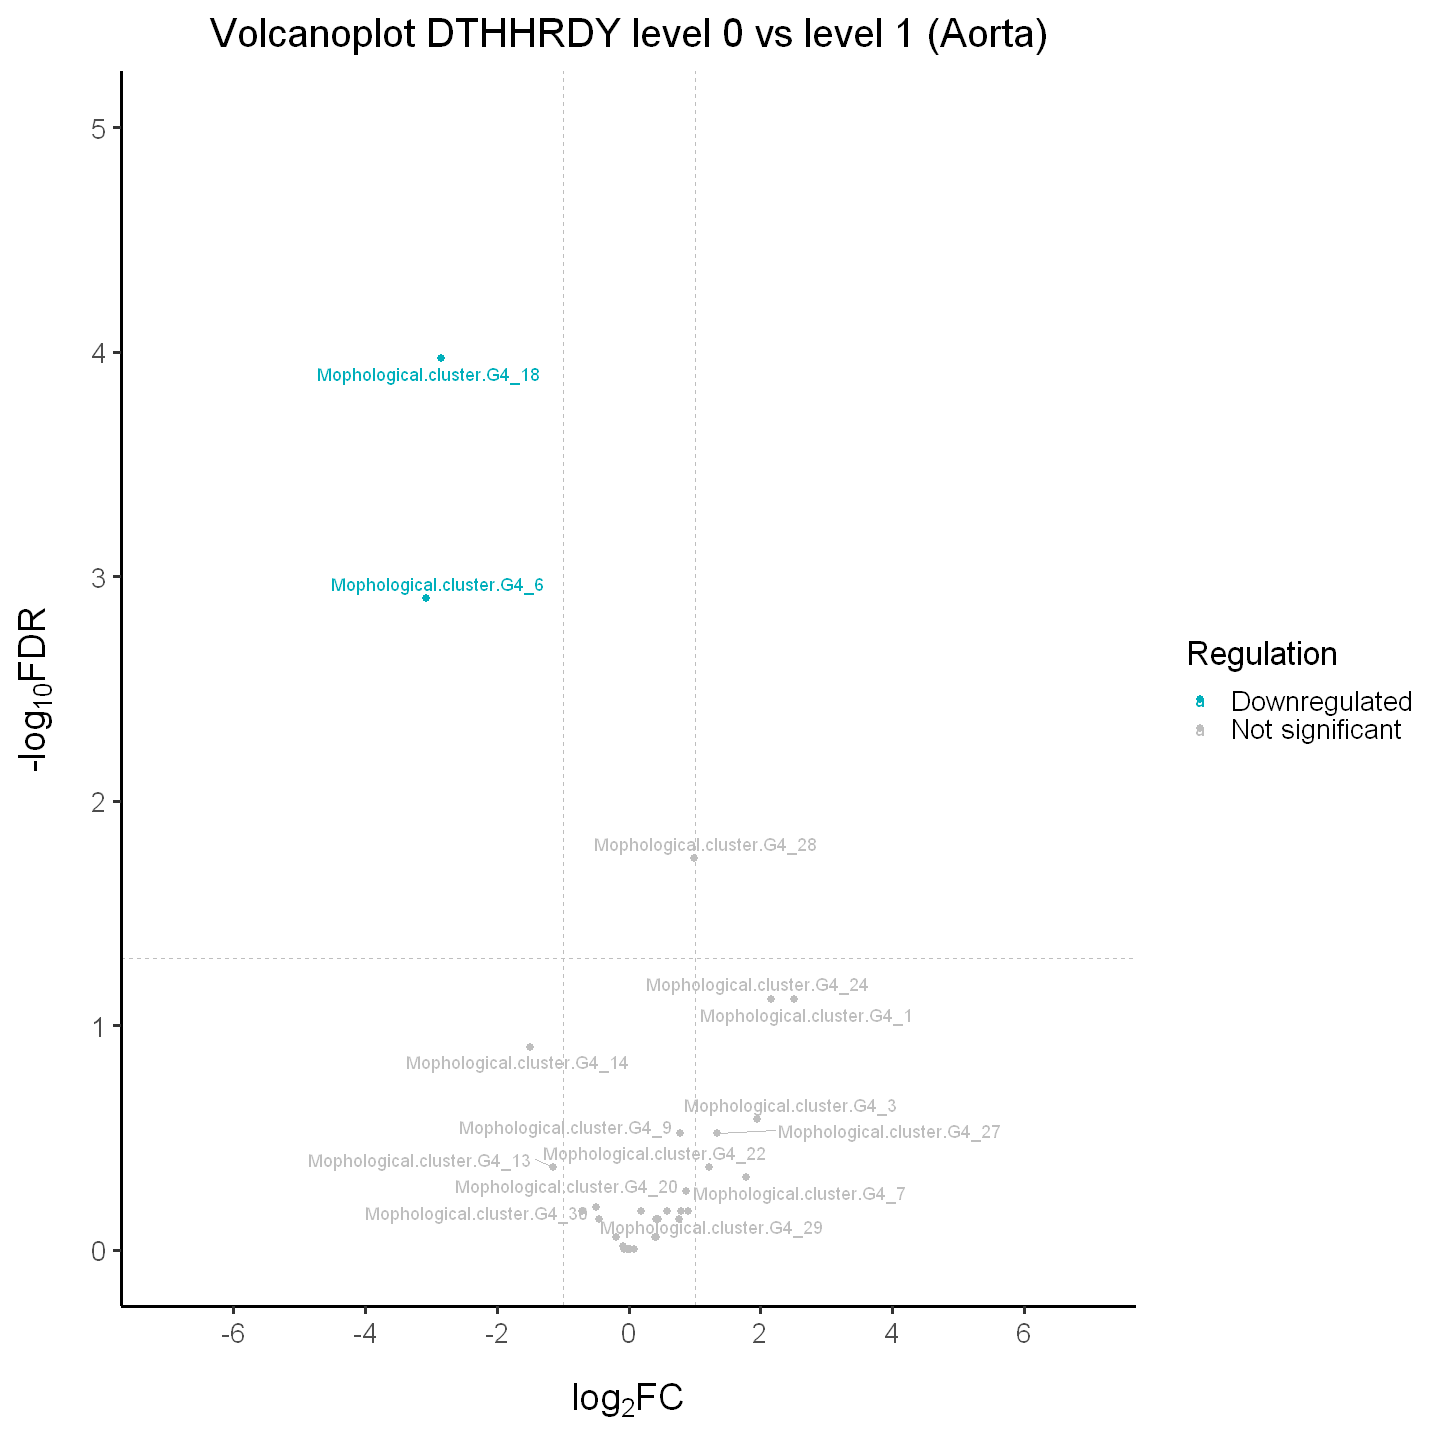

In [102]:
#Source : https://biostatsquid.com/volcano-plots-r-tutorial/

library(tidyverse) # includes ggplot2, for data visualisation. dplyr, for data manipulation.
library(RColorBrewer) # for a colourful plot
library(ggrepel) # for nice annotations


##### DTHHRDY volcanoplot between level 0 and level 1 of DTHHRDY
d_topTags <- topTags(qlf, n = 32)$table[ ,-2]
# Biostatsquid theme
theme_set(theme_classic(base_size = 20) +
            theme(
              axis.title.y = element_text(face = "bold", margin = margin(0,20,0,0), size = rel(1.1), color = 'black'),
              axis.title.x = element_text(hjust = 0.5, face = "bold", margin = margin(20,0,0,0), size = rel(1.1), color = 'black'),
              plot.title = element_text(hjust = 0.5)
            ))
# Add a column to the data frame to specify if they are UP- or DOWN- regulated 
d_topTags$diffexpressed <- "NO"  # add a column diffexpressed with only NO  
# if log2Foldchange > 1 and FDR < 0.05, set as "UP"  
d_topTags$diffexpressed[d_topTags$logFC > 1 & d_topTags$FDR < 0.05] <- "UP"
# if log2Foldchange < -1 and FDR < 0.05, set as "DOWN"
d_topTags$diffexpressed[d_topTags$logFC < -1 & d_topTags$FDR < 0.05] <- "DOWN"

# Create a new column "delabel" to de, that will contain the name of the top 15 differentially expressed genes (NA in case they are not)
data_test<- d_topTags
names <- rownames(d_topTags)
d_topTags <- cbind(names,d_topTags)
d_topTags$delabel <- ifelse(d_topTags$names %in% head(d_topTags[order(d_topTags$FDR), "names"], 15), d_topTags$names, NA)

# Set plot size: width and height in inches
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot(data = d_topTags, aes(x = logFC, y = -log10(FDR), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-1, 1), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') + 
  geom_point(size = 2) + 
  scale_color_manual(values = c("#00AFBB", "grey", "#bb0c00"), # to set the colours of our variable  
                     labels = c("Downregulated", "Not significant", "Upregulated")) + 
  coord_cartesian(ylim = c(0, 5), xlim = c(-7, 7)) + # set the limits of the axes
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"FDR")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  ggtitle('Volcanoplot DTHHRDY level 0 vs level 1 (Aorta)') +
  geom_text_repel(max.overlaps = Inf) # To show all labels

We can see that we only have two significant downregulated morphological cluster in the level 0 of hardy scale compared to the level 1. It is because the FDR are pretty high leading to a high chance of false positive.

### 2.3 For non-technical variables, redo the analysis with adjustment for the confounding technical variables

As a reminder, we obtained in question 1 the following cofounded variables : 

Clinical variables (demographic/health variables) : 

- `AGE` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `SEX` is cofounded by `DTHHRDY`
- `HGHT` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `WGHT` is cofounded by `TRISCHD` and `COHORT`
- `BMI` is not cofounded by any technical variable.

Let's define another function `DME_cofounding` that allows to take into account the cofounded variables for each health variables.

In [108]:
DME_cofounding <- function(clinical_variable, formula_cofounded){

    # Create the differential expression data structure used by edgeR (DGEList)
    DGE_list <- DGEList(counts = morphological_counts, group = clinical_data[[clinical_variable]])
    
    # Filter lowly expressed morphological clusters
    keep <- filterByExpr(DGE_list)
    DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]
    # Normalize the data
    DGE_list <- normLibSizes(DGE_list)

    # Create a design matrix
    formula <- as.formula(formula_cofounded)
    design <- model.matrix(formula)
    
    #Estimate the dispersion
    DGE_list <- estimateDisp(DGE_list, design)

    # Fit the model and test for differential expression
    fit <- glmQLFit(DGE_list,design)
    qlf <- glmQLFTest(fit,coef=2)

    # We take the top 10 most significant differentially expressed morphological counts. We also remove the logCPM just to have a clearer print for the results.
    return (topTags(qlf, n = 10)$table[ ,-2])
}

In [109]:
non_technical_variables = c("AGE", "SEX", "HGHT", "WGHT", "BMI")
formulas_cofounding = c("~clinical_data$AGE + clinical_data$TRISCHD + clinical_data$COHORT + clinical_data$DTHHRDY", 
                      "~clinical_data$SEX + clinical_data$DTHHRDY",
                      "~clinical_data$HGHT + clinical_data$TRISCHD + clinical_data$COHORT + clinical_data$DTHHRDY",
                      "~clinical_data$WGHT + clinical_data$TRISCHD + clinical_data$COHORT",
                       "~clinical_data$BMI")

In [110]:
# Create a list DME that will contain the results of differential morphological expression
DME_cofounded_non_technical_variable <- list()

# Iterate through each clinical variables and apply the function DME on them
for (i in 1:length(non_technical_variables)){
    var = non_technical_variables[i]
    formula = formulas_cofounding[i]
    DME_cofounded_non_technical_variable[[var]] <- DME_cofounding(var, formula)
}
# Print the final results of the 5 DME considering cofounded variables
print(DME_cofounded_non_technical_variable)

$AGE
                                 logFC        F       PValue          FDR
Mophological.cluster.G4_29  0.07647763 35.82758 6.665918e-09 1.952955e-07
Mophological.cluster.G4_11 -0.06307568 34.49961 1.220597e-08 1.952955e-07
Mophological.cluster.G4_26 -0.04833630 33.16163 2.252480e-08 2.402645e-07
Mophological.cluster.G4_12  0.08851100 30.50832 7.666814e-08 6.133451e-07
Mophological.cluster.G4_15 -0.03189881 24.25589 1.453075e-06 9.299681e-06
Mophological.cluster.G4_8   0.06417482 23.52885 2.056993e-06 1.097063e-05
Mophological.cluster.G4_0   0.06500400 20.98498 7.008911e-06 3.204073e-05
Mophological.cluster.G4_27  0.03234288 11.71807 7.126279e-04 2.850512e-03
Mophological.cluster.G4_18 -0.03484179 11.04806 1.007549e-03 3.582398e-03
Mophological.cluster.G4_22  0.03205024  9.57265 2.177208e-03 6.967065e-03

$SEX
                                logFC         F       PValue         FDR
Mophological.cluster.G4_3   1.1635289 17.528836 3.801187e-05 0.001178368
Mophological.cluster.G4_6   1

For `question 2.3`, the interpretation of the differentially expression results for the 5 clinical variables is exactly the same as for the technical variables in `question 2.2`. So we will not talk about these results to avoid too much ouputs.

However, we can compare the results that we obtained for the differentially expression of the clinical variables when the cofounded variables are include or not in the model formula. We only provided an example with `AGE` as the observations are very similar for the other clinical variables.

In [124]:
# No cofounding variables
print(DME_clinical_variable$AGE[1:10,])

                                 logFC        F       PValue          FDR
Mophological.cluster.G4_26 -0.04961342 49.94846 1.235350e-11 2.807475e-10
Mophological.cluster.G4_12  0.10782144 49.13921 1.754672e-11 2.807475e-10
Mophological.cluster.G4_29  0.08340457 47.95910 2.932231e-11 3.127713e-10
Mophological.cluster.G4_15 -0.03239720 34.02733 1.484359e-08 1.187487e-07
Mophological.cluster.G4_0   0.07894091 33.05408 2.321471e-08 1.485742e-07
Mophological.cluster.G4_11 -0.04726054 27.66473 2.852787e-07 1.521486e-06
Mophological.cluster.G4_8   0.05287568 19.29719 1.583575e-05 7.239199e-05
Mophological.cluster.G4_30  0.02906564 17.96298 3.052835e-05 1.221134e-04
Mophological.cluster.G4_27  0.03286669 15.30982 1.143687e-04 4.066444e-04
Mophological.cluster.G4_20 -0.02704695 10.49634 1.338995e-03 4.284783e-03


In [123]:
# Cofounding variables
print(DME_cofounded_non_technical_variable$AGE)

                                 logFC        F       PValue          FDR
Mophological.cluster.G4_29  0.07647763 35.82758 6.665918e-09 1.952955e-07
Mophological.cluster.G4_11 -0.06307568 34.49961 1.220597e-08 1.952955e-07
Mophological.cluster.G4_26 -0.04833630 33.16163 2.252480e-08 2.402645e-07
Mophological.cluster.G4_12  0.08851100 30.50832 7.666814e-08 6.133451e-07
Mophological.cluster.G4_15 -0.03189881 24.25589 1.453075e-06 9.299681e-06
Mophological.cluster.G4_8   0.06417482 23.52885 2.056993e-06 1.097063e-05
Mophological.cluster.G4_0   0.06500400 20.98498 7.008911e-06 3.204073e-05
Mophological.cluster.G4_27  0.03234288 11.71807 7.126279e-04 2.850512e-03
Mophological.cluster.G4_18 -0.03484179 11.04806 1.007549e-03 3.582398e-03
Mophological.cluster.G4_22  0.03205024  9.57265 2.177208e-03 6.967065e-03


We can see that the overall top 10 is quite similar when the cofounded variables are included in the model or when they are not. Also, the values of logFC for each pair of cluster are very close to each other. However, FDR are lower when no cofounding variables are taken in the model which is not what we expected at first sight. Indeed, we thought that false discovery rate would be lower when including coufounding variables as it should increase the fiability of the results. 

## Question 3. Morphology vs gene expression

In [125]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("RNA_read_counts.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(RNA_read_counts)
dim(RNA_read_counts_init)
head(RNA_read_counts_init)

[1] 56200   282

,Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
2,ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
5,ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [129]:
rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts<-as.matrix(RNA_read_counts_init[,-c(1,2)])
head(RNA_read_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000223972.5,0,0,0,0,0,5,0,0,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,1,0,0,1,0,0,2,0,4,1,⋯,0,0,0,0,0,0,0,0,0,0


Let $X=\{x_1,\ldots,x_n\}$ be a sample of a univariate random variable. The _mean absolute deviation_ of $X$ is defined as the median of the absolute deviations from the sample's median, or in symbolic form

\begin{equation*}
\mathrm{MAD}=\mathrm{median}(\{\vert x_i-\mathrm{median}(X)\vert\,\vert\,i=1,\ldots,n\})
\end{equation*}

In [151]:
MAD<-numeric(nrow(RNA_read_counts))
for (i in 1:nrow(RNA_read_counts)){
    MAD[i]<-mad(RNA_read_counts[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)

In [221]:
summary(MAD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.7    393.5     48.9 394697.8 

In [135]:
morphological_counts_init[-1]

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0
GTEX.117XS.0426,339,1,151,637,1844,473,260,3,440,153,⋯,148,166,43,49,158,211,184,142,277,3
GTEX.117YW.0226,171,0,36,791,1011,234,162,0,54,129,⋯,106,68,1,0,76,489,68,281,254,6
GTEX.11DXX.0426,2,10,258,1558,850,48,0,11,2491,325,⋯,8,89,952,0,26,197,323,5,70,0
GTEX.11DXZ.0426,1,239,850,282,41,206,1,370,839,291,⋯,138,342,1459,64,491,38,310,3,46,4
GTEX.11DYG.1226,392,18,14,10,316,57,742,5,232,123,⋯,12,124,129,1,116,254,238,483,185,8
GTEX.11EM3.0226,40,424,605,135,94,58,861,4,11,349,⋯,134,285,637,49,304,143,558,27,542,0


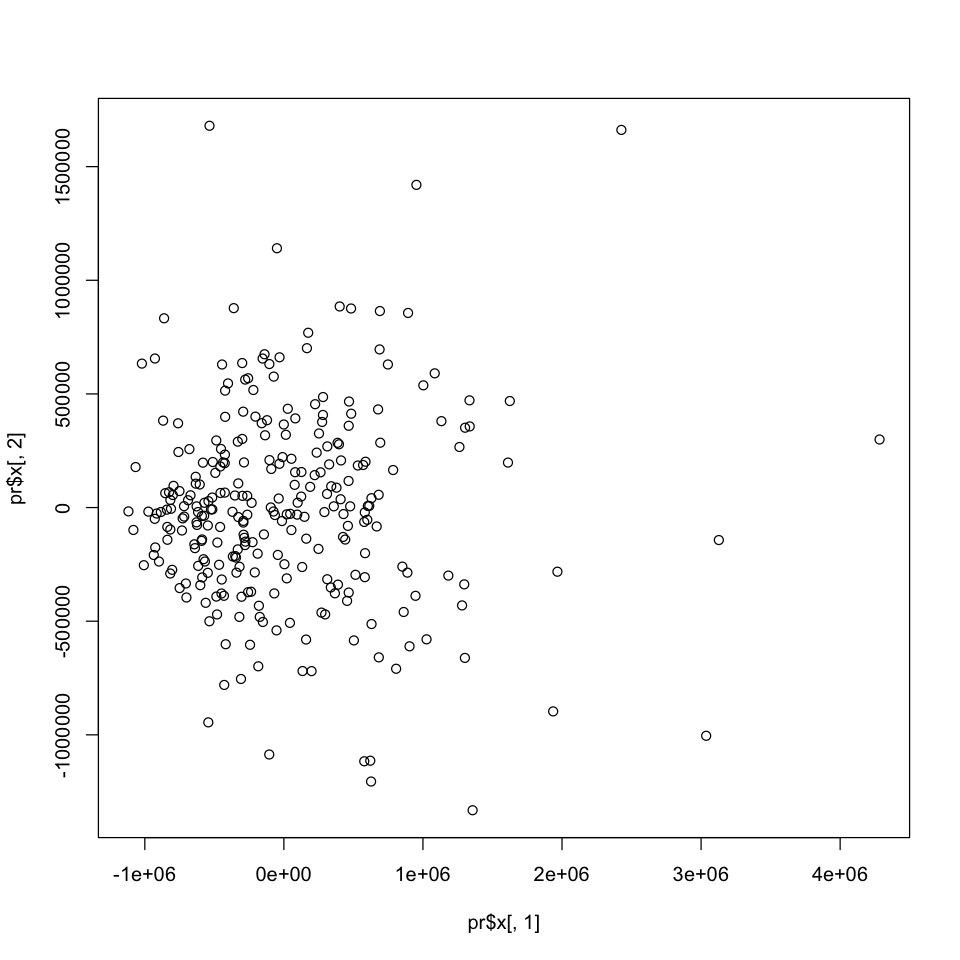

In [130]:
pr = prcomp(t(RNA_read_counts))
plot(pr$x[,1],pr$x[,2])

In [10]:
summary(pr)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7.238e+05 4.303e+05 4.107e+05 2.172e+05 1.806e+05
Proportion of Variance 4.182e-01 1.478e-01 1.346e-01 3.765e-02 2.604e-02
Cumulative Proportion  4.182e-01 5.660e-01 7.006e-01 7.383e-01 7.643e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     1.717e+05 1.547e+05 1.394e+05 1.382e+05 1.288e+05
Proportion of Variance 2.352e-02 1.911e-02 1.552e-02 1.525e-02 1.325e-02
Cumulative Proportion  7.879e-01 8.070e-01 8.225e-01 8.377e-01 8.510e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     1.230e+05 1.141e+05 1.126e+05 1.054e+05 9.733e+04
Proportion of Variance 1.207e-02 1.040e-02 1.012e-02 8.870e-03 7.560e-03
Cumulative Proportion  8.630e-01 8.734e-01 8.836e-01 8.924e-01 9.000e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     9.

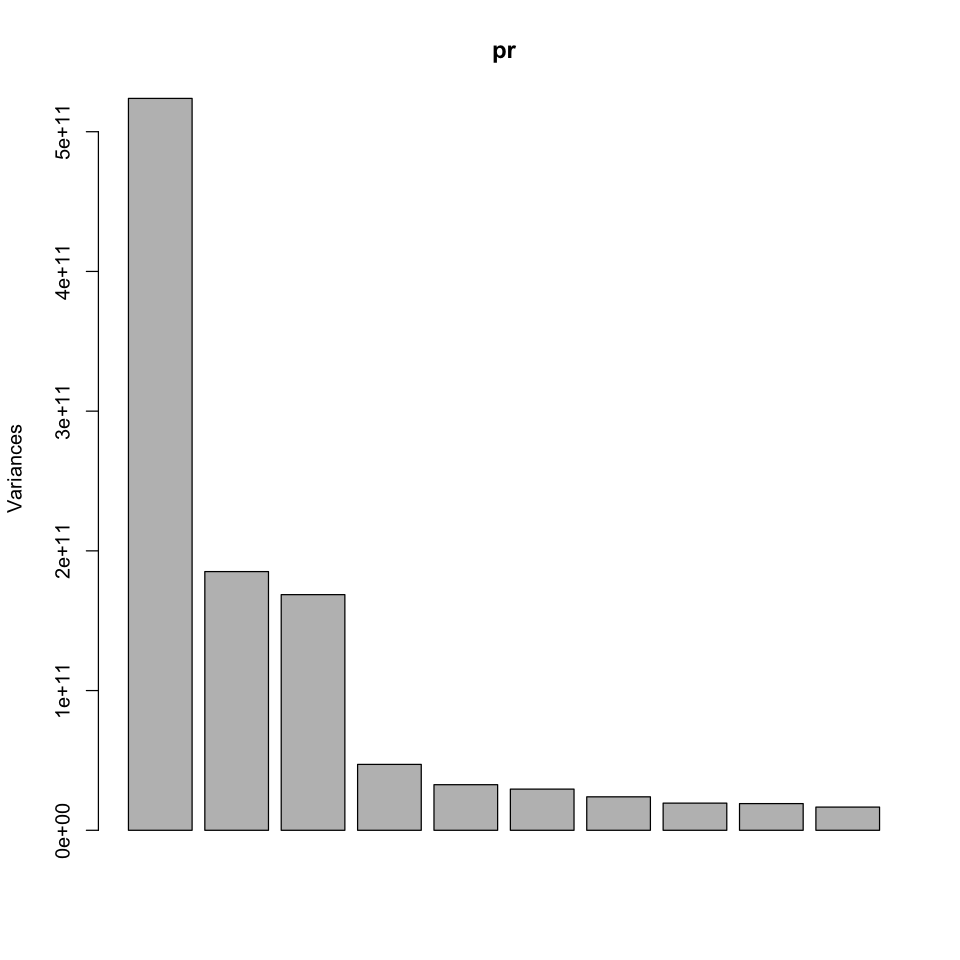

In [11]:
plot(pr)

In [14]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'DESeq2'




Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


Old packages: 'BH', 'BiocFileCache', 'BiocManager', 'biomaRt', 'Biostrings',
  'boot', 'brew', 'brio', 'broom', 'broom.helpers', 'BSgenome', 'bslib',
  'cachem', 'callr', 'codetools', 'commonmark', 'curl', 'data.table', 'DBI',
  'dbplyr', 'deldir', 'digest', 'edgeR', 'farver', 'fastmap', 'forecast', 'fs',
  'GenomeInfoDb', 'GenomicAlignments', 'GenomicFeatures', 'ggplot2', 'ggstats',
  'gh', 'glue', 'gtable', 'htmltools', 'httpuv', 'httr2', 'interp',
  'KernSmooth', 'knitr', 'labelled', 'lattice', 'lda', 'locfit', 'matrixStats',
  'mboost', 'mgcv', 'munsell', 'openssl', 'pbdZMQ', 'pixmap', 'pkgbuild',
  'pkgdown', 'pkgload', 'processx', 'promises', 'ps', 'R.oo', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'remotes', 'repr', 'Rhtslib',
  'rlang', 'rmarkdown', 'roxygen2', 'RSQLite', 'rstudioapi', 'Rsubread',
  'rvest', 'S4Arrays', 'sass', 'segmented', 'shiny', 'sm', 'sp', 'SparseArray',
  'stringi', 'survival', 'systemfonts', 'testthat', 'tidyr', 'tidyselect',
  'ti

In [16]:
library(DESeq2)

Warning message:
“le package ‘DESeq2’ a été compilé avec la version R 4.3.3”
Le chargement a nécessité le package : S4Vectors

Warning message:
“le package ‘S4Vectors’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics


Attachement du package : ‘BiocGenerics’


Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attachement du package : ‘S4Vectors’


L'objet suivant est masqué depuis ‘package:utils’:

    findMat

In [222]:
install.packages("pheatmap")
library(pheatmap)
pheatmap(RNA_read_counts, scale = 'row', show_rownames = FALSE)


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


## The theory behind DESeq2